In [ ]:
# Part 1: Imports and Setup

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import (
    mean_squared_error, r2_score, mean_absolute_error,
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc
)

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Try to import SHAP if available
try:
    import shap
    shap_available = True
except ImportError:
    shap_available = False
    print("SHAP library not available. Feature importance interpretations will be limited.")

# Settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_excel('/content/Dsbi_data.xlsx')

# Display the first few rows
df.head()

# Get basic information about the dataset
print(f"Dataset shape: {df.shape}")
print("\nDataset info:")
df.info()

# Summary statistics
df.describe(include='all')

# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
}).sort_values('Percentage', ascending=False)

# Display columns with missing values
missing_df[missing_df['Missing Values'] > 0]

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

Dataset shape: (150482, 14)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150482 entries, 0 to 150481
Data columns (total 14 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   City                                               150479 non-null  object 
 1   State                                              150482 non-null  object 
 2   Postal Code                                        150479 non-null  float64
 3   Model Year                                         150482 non-null  int64  
 4   Make                                               150482 non-null  object 
 5   Model                                              150482 non-null  object 
 6   Electric Vehicle Type                              150482 non-null  object 
 7   Clean Alternative Fuel Vehicle (CAFV) Eligibility  150482 non-null  object 
 8   Electric Range                 

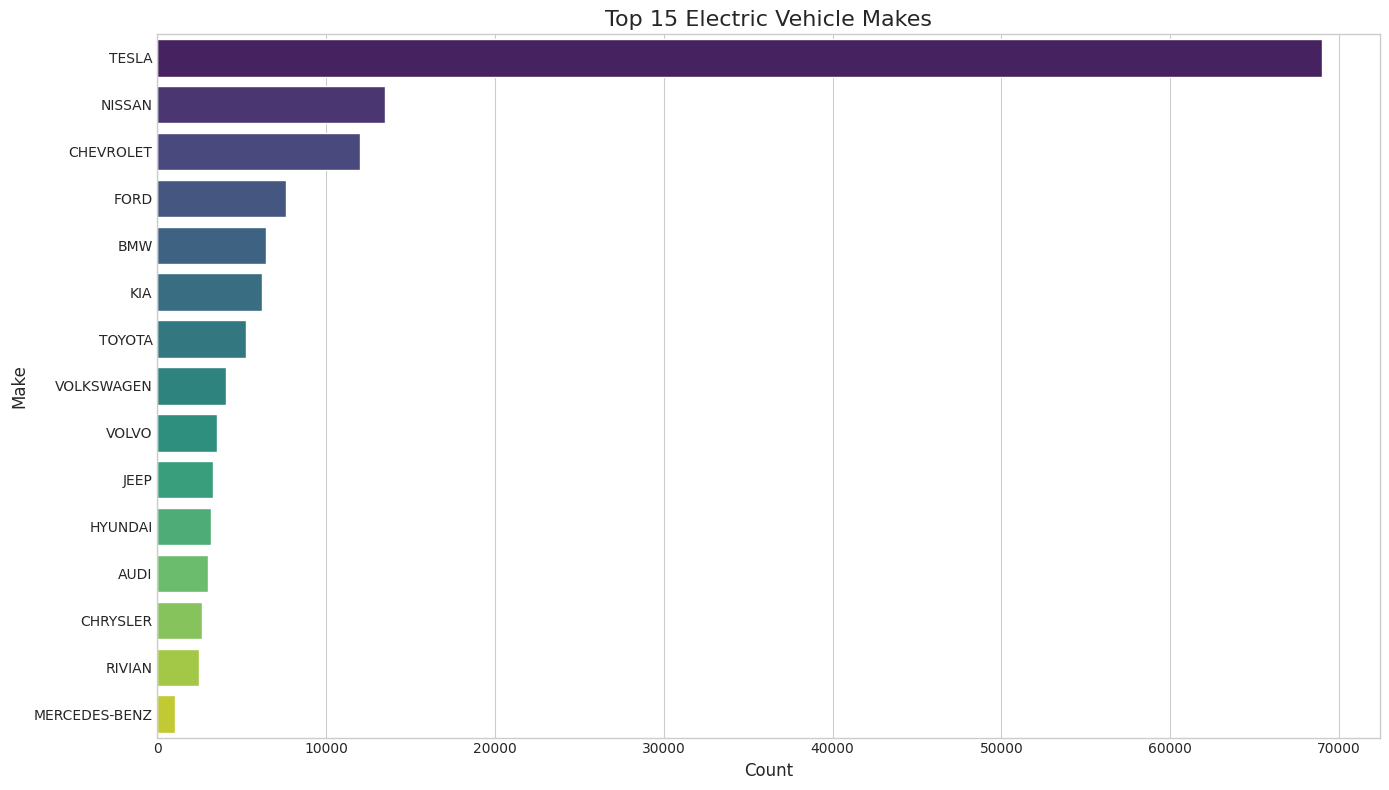

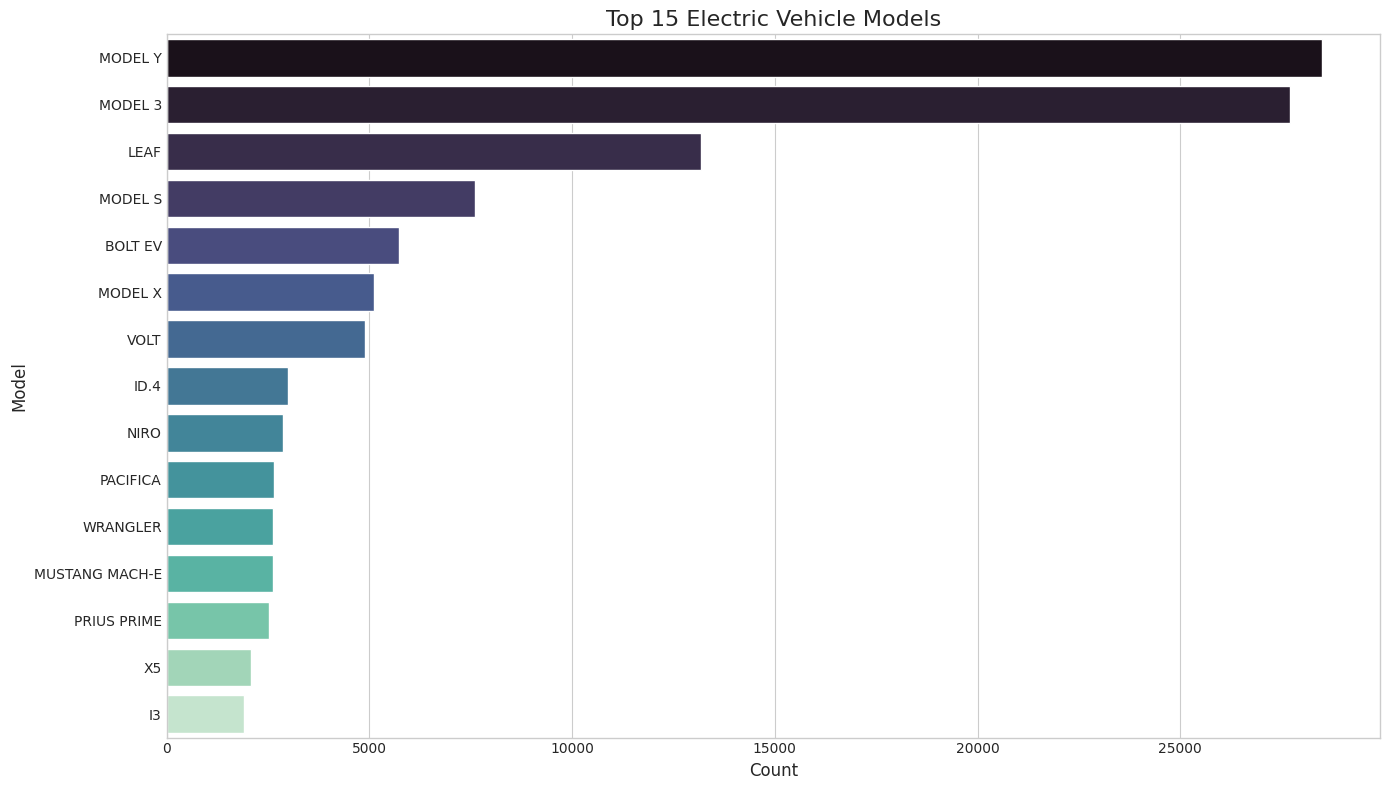

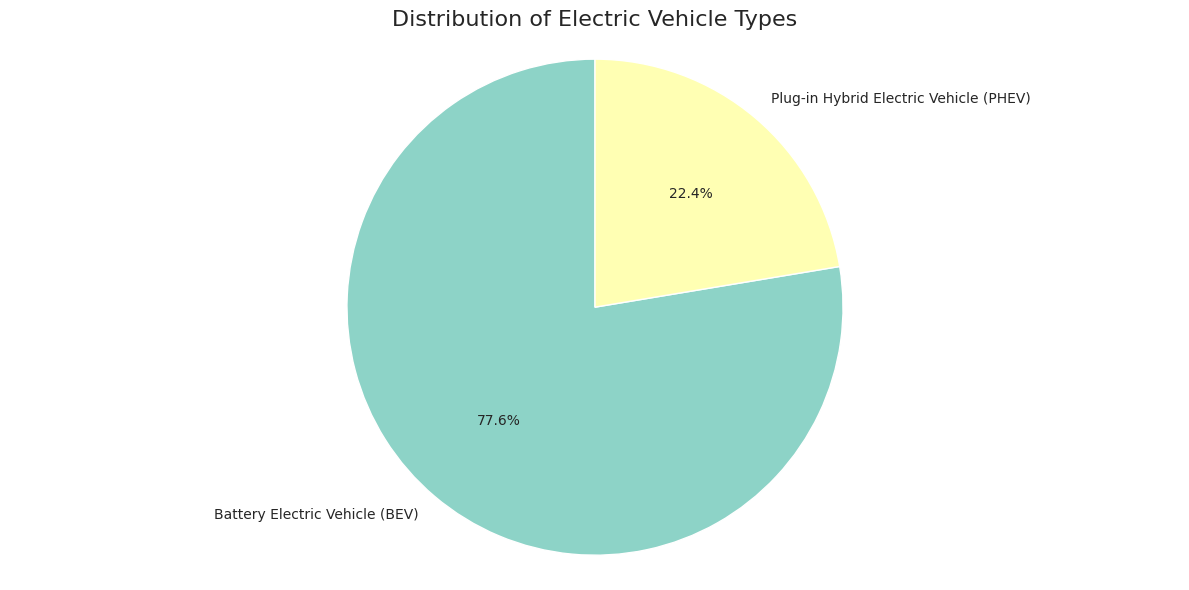

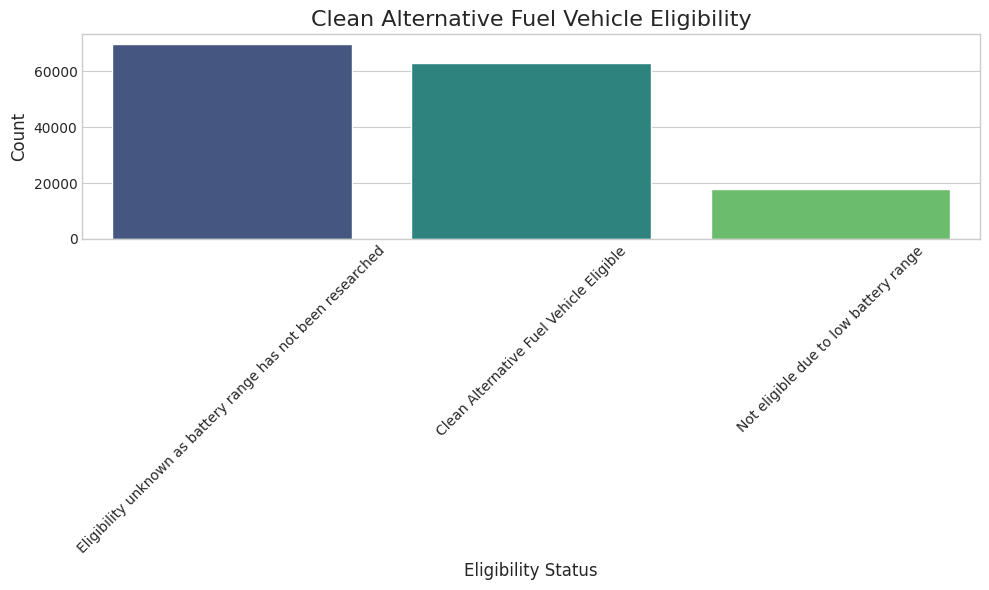

In [ ]:
# Part 2: Categorical Variables Exploration

# Top vehicle makes
plt.figure(figsize=(14, 8))
top_makes = df['Make'].value_counts().head(15)
sns.barplot(x=top_makes.values, y=top_makes.index, palette='viridis')
plt.title('Top 15 Electric Vehicle Makes', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Make', fontsize=12)
plt.tight_layout()
plt.show()

# Top vehicle models
plt.figure(figsize=(14, 8))
top_models = df['Model'].value_counts().head(15)
sns.barplot(x=top_models.values, y=top_models.index, palette='mako')
plt.title('Top 15 Electric Vehicle Models', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.tight_layout()
plt.show()

# Electric Vehicle Types
plt.figure(figsize=(12, 6))
ev_types = df['Electric Vehicle Type'].value_counts()
plt.pie(ev_types, labels=ev_types.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
plt.title('Distribution of Electric Vehicle Types', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Clean Alternative Fuel Vehicle Eligibility
plt.figure(figsize=(10, 6))
eligibility_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
sns.barplot(x=eligibility_counts.index, y=eligibility_counts.values, palette='viridis')
plt.title('Clean Alternative Fuel Vehicle Eligibility', fontsize=16)
plt.xlabel('Eligibility Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

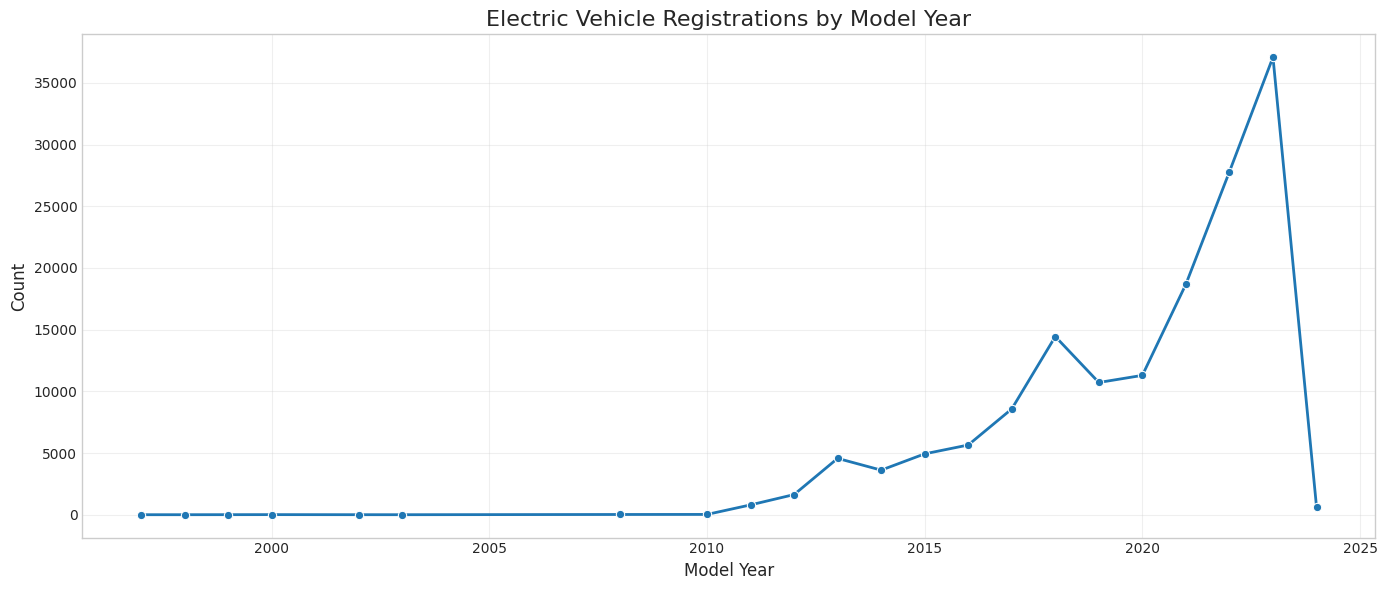

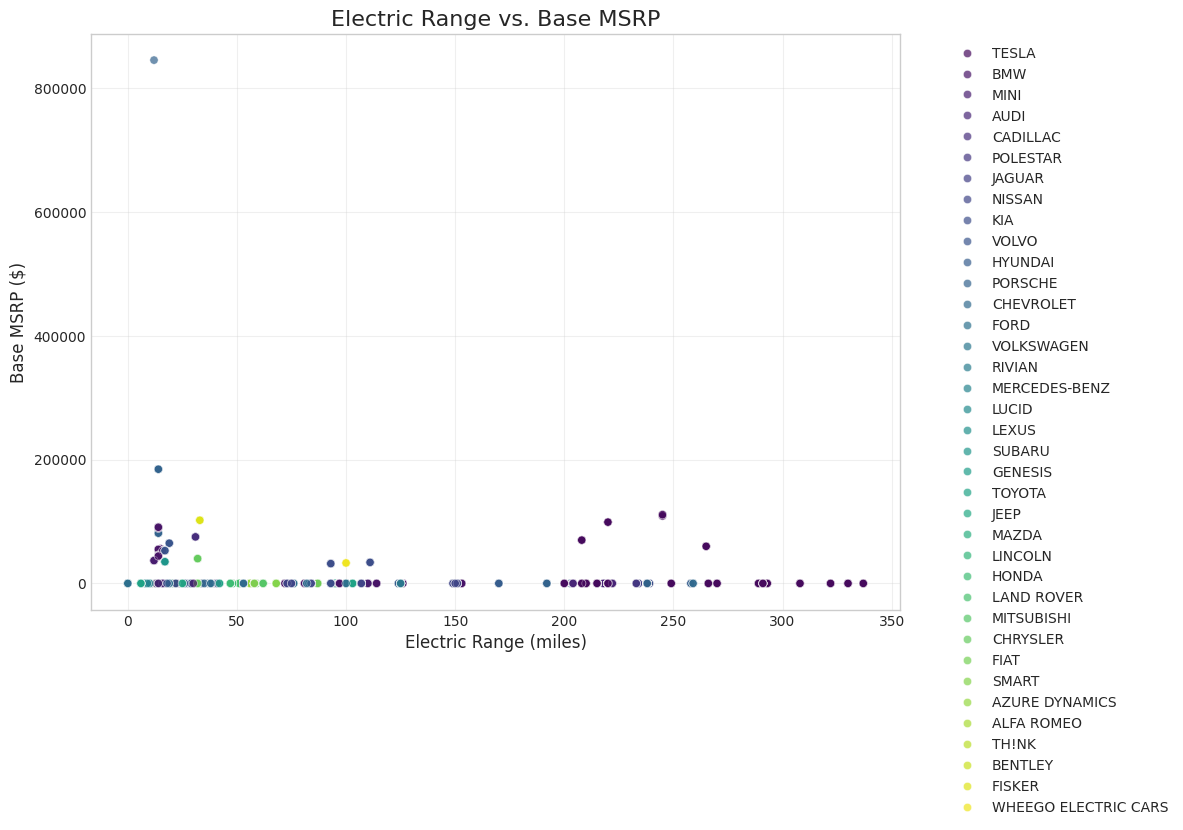

In [ ]:
# Part 3: Numerical Variables Exploration

# Model Year Distribution
plt.figure(figsize=(14, 6))
year_counts = df['Model Year'].value_counts().sort_index()
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', linewidth=2)
plt.title('Electric Vehicle Registrations by Model Year', fontsize=16)
plt.xlabel('Model Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Relationship between Electric Range and Base MSRP
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df, alpha=0.7, hue='Make', palette='viridis')
plt.title('Electric Range vs. Base MSRP', fontsize=16)
plt.xlabel('Electric Range (miles)', fontsize=12)
plt.ylabel('Base MSRP ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



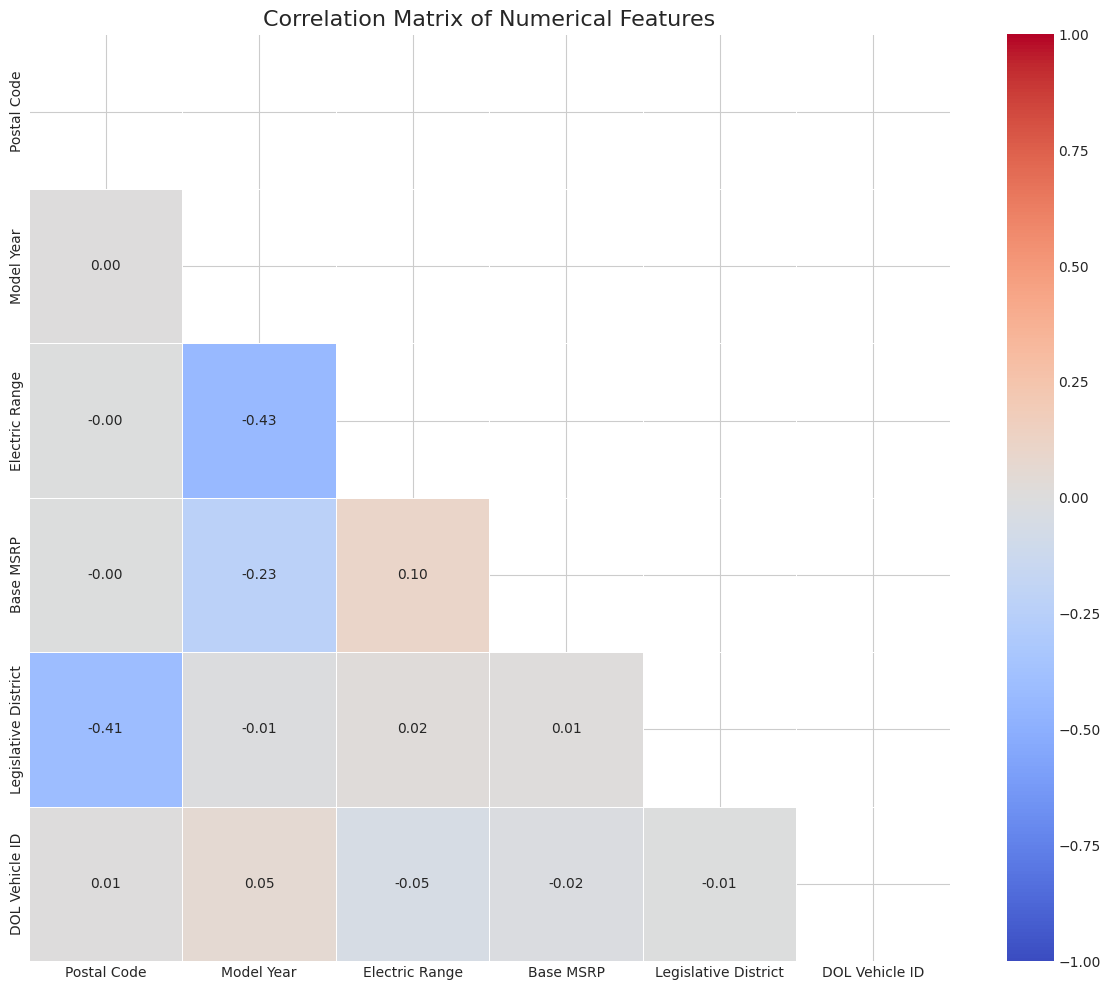

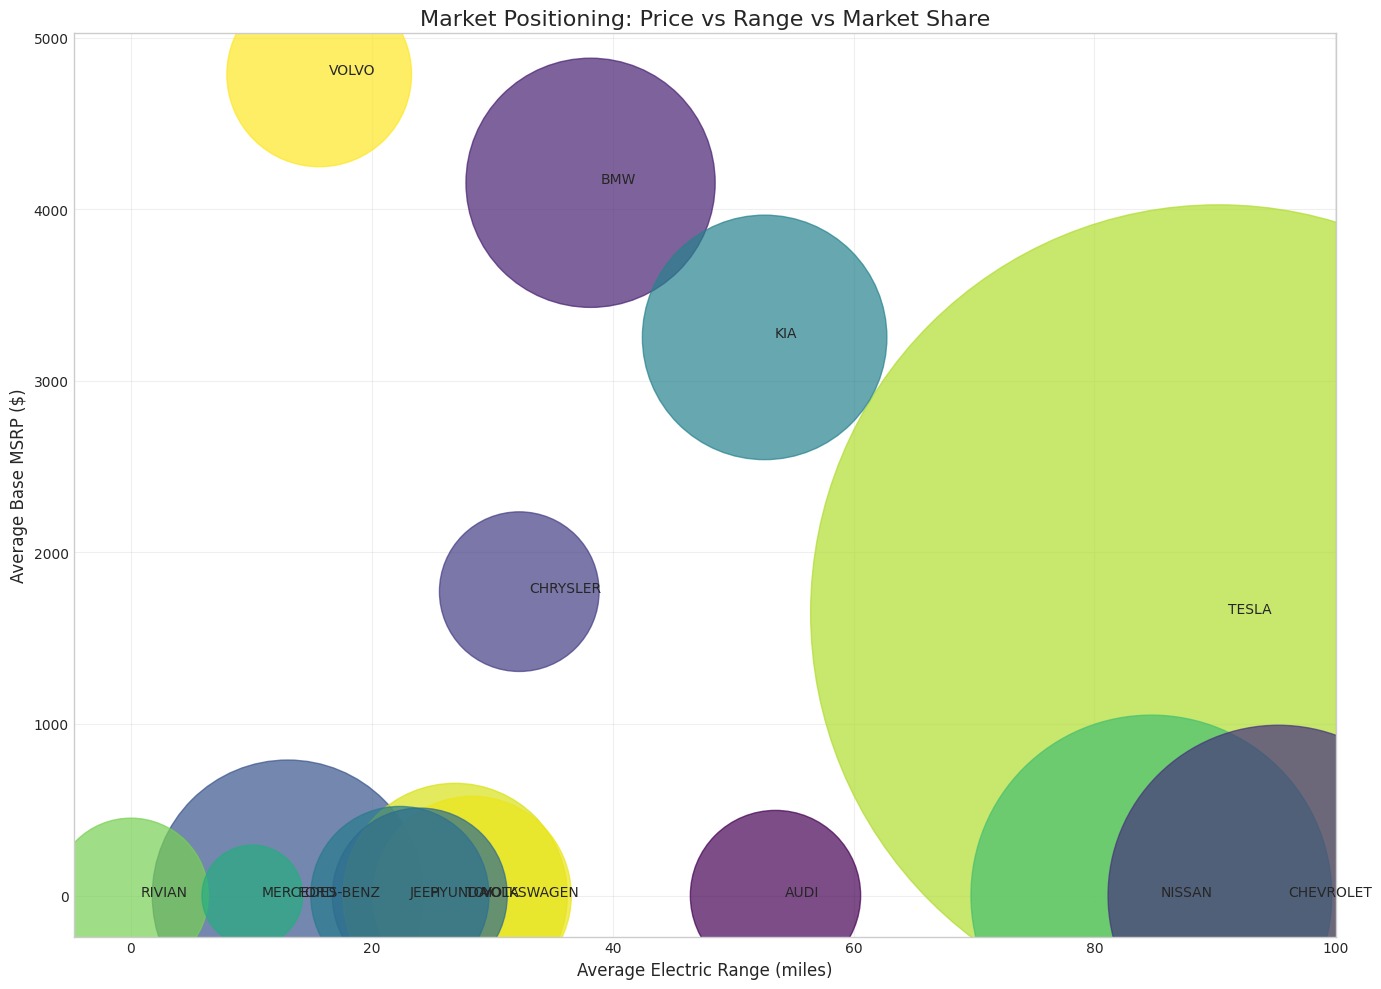

In [ ]:
# Part 4: Correlation Analysis and Advanced Visualizations

# Identify numerical columns for correlation analysis
num_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr_matrix = num_df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()



# Market Segmentation - Price vs Range with Bubble Size as Count
plt.figure(figsize=(14, 10))

# Group by make and calculate means
make_data = df.groupby('Make').agg({
    'Electric Range': 'mean',
    'Base MSRP': 'mean',
    'Make': 'count'
}).rename(columns={'Make': 'Count'}).reset_index()

# Filter to top 15 manufacturers by count for clarity
top_makes = make_data.sort_values('Count', ascending=False).head(15)

# Create bubble chart
plt.scatter(top_makes['Electric Range'], top_makes['Base MSRP'],
           s=top_makes['Count']*5, # Scale bubble size
           alpha=0.7,
           c=top_makes.index,
           cmap='viridis')

# Add manufacturer labels
for i, make in enumerate(top_makes['Make']):
    plt.annotate(make,
                (top_makes['Electric Range'].iloc[i], top_makes['Base MSRP'].iloc[i]),
                xytext=(7, 0),
                textcoords='offset points')

plt.title('Market Positioning: Price vs Range vs Market Share', fontsize=16)
plt.xlabel('Average Electric Range (miles)', fontsize=12)
plt.ylabel('Average Base MSRP ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Interactive Plotly visualization - Range evolution by make over years
year_make_range = df.groupby(['Model Year', 'Make'])['Electric Range'].mean().reset_index()

# Get top 8 makes for clarity
top_8_makes = df['Make'].value_counts().head(8).index.tolist()
year_make_range_filtered = year_make_range[year_make_range['Make'].isin(top_8_makes)]

# Create interactive plot
fig = px.line(year_make_range_filtered, x='Model Year', y='Electric Range', color='Make',
             title='Evolution of Electric Range by Manufacturer Over Time',
             labels={'Electric Range': 'Average Electric Range (miles)', 'Model Year': 'Year'},
             line_shape='linear', markers=True)

fig.update_layout(
    height=600,
    legend_title='Manufacturer',
    hovermode='closest'
)

fig.show()

Imputed Postal Code with median value: 98122.0
Imputed Legislative District with median value: 33.0
Imputed City with mode value: Seattle
Imputed Vehicle Location with mode value: POINT (-122.12302 47.67668)
Imputed Electric Utility with mode value: PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)

Missing values after imputation: 0
Outliers in Electric Range:
  Total count: 10073
  Percentage: 6.69%
  Range: [0, 337]
  Outlier threshold: [-145.5, 242.5]



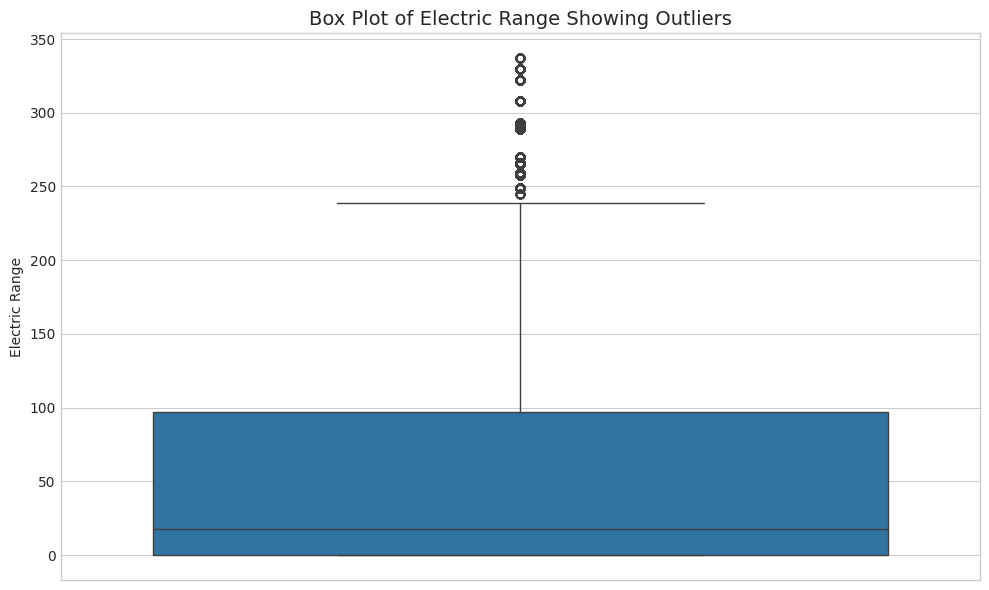

Outliers in Base MSRP:
  Total count: 3455
  Percentage: 2.30%
  Range: [0, 845000]
  Outlier threshold: [0.0, 0.0]



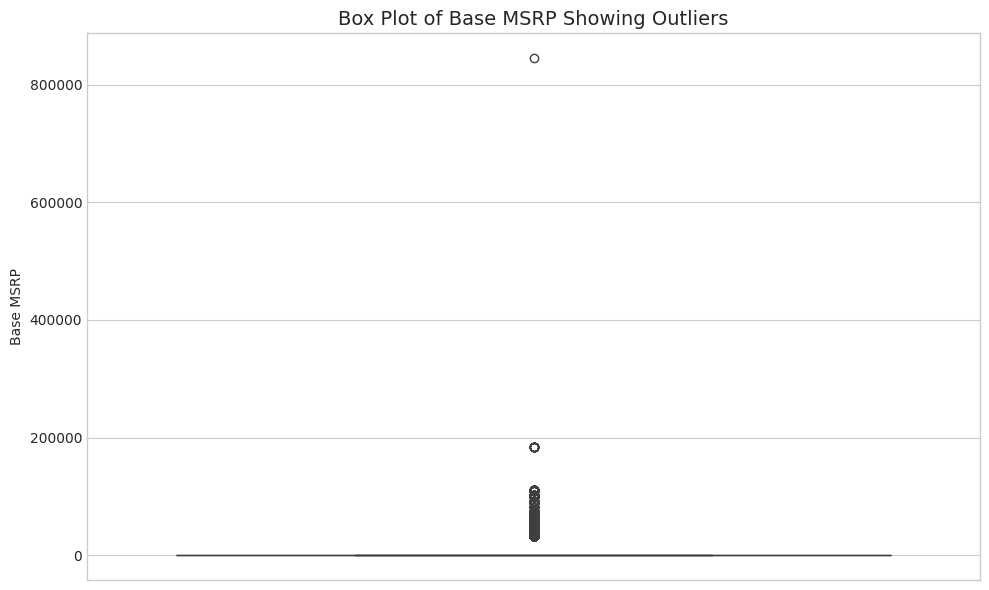

Outliers in Electric Range:
  Total count: 10073
  Percentage: 6.69%
  Range: [0, 337]
  Outlier threshold: [-145.5, 242.5]

After capping outliers in Electric Range:
  Range: [0.0, 242.5]

Outliers in Base MSRP:
  Total count: 3455
  Percentage: 2.30%
  Range: [0, 845000]
  Outlier threshold: [0.0, 0.0]

After capping outliers in Base MSRP:
  Range: [0.0, 0.0]

Columns to encode: ['City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Vehicle Location', 'Electric Utility']
Encoded Clean Alternative Fuel Vehicle (CAFV) Eligibility with the following mapping:
  Clean Alternative Fuel Vehicle Eligible -> 0
  Eligibility unknown as battery range has not been researched -> 1
  Not eligible due to low battery range -> 2
One-hot encoded Make with categories: ['Make_BMW', 'Make_CHEVROLET', 'Make_FORD', 'Make_NISSAN', 'Make_Other', 'Make_TESLA']
One-hot encoded Model with categories: ['Model_BOLT EV', 'Model_LEAF', 'Model_MODEL 3', 'Model_MODEL S', 'Model_MODEL Y', 'Model_Other']
One-hot 

,mean,std
Postal Code,-1.390092e-15,1.000003
Model Year,2.275520e-15,1.000003
Electric Range,5.137295e-17,1.000003
Base MSRP,0.000000e+00,0.000000
Legislative District,-6.912684e-17,1.000003
DOL Vehicle ID,6.818249e-17,1.000003


In [ ]:
# Part 5: Data Preprocessing

# Create a copy of the dataframe for preprocessing
df_clean = df.copy()

# Handle missing values based on column type
# For each column with missing values, we'll choose an appropriate strategy

# Numerical columns - impute with median
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"Imputed {col} with median value: {median_value}")

# Categorical columns - impute with mode (most frequent)
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_value = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode value: {mode_value}")

# Verify no missing values remain
print(f"\nMissing values after imputation: {df_clean.isnull().sum().sum()}")

# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"Outliers in {column}:")
    print(f"  Total count: {len(outliers)}")
    print(f"  Percentage: {len(outliers) / len(df) * 100:.2f}%")
    print(f"  Range: [{df[column].min()}, {df[column].max()}]")
    print(f"  Outlier threshold: [{lower_bound}, {upper_bound}]\n")

    return outliers.index, lower_bound, upper_bound

# Detect outliers in key numerical columns
for col in ['Electric Range', 'Base MSRP']:
    outlier_indices, lower_bound, upper_bound = detect_outliers(df_clean, col)

    # Visualize with box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df_clean[col])
    plt.title(f'Box Plot of {col} Showing Outliers', fontsize=14)
    plt.tight_layout()
    plt.show()

# Handle outliers with capping
for col in ['Electric Range', 'Base MSRP']:
    _, lower_bound, upper_bound = detect_outliers(df_clean, col)

    # Cap outliers
    df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
    df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

    print(f"After capping outliers in {col}:")
    print(f"  Range: [{df_clean[col].min()}, {df_clean[col].max()}]\n")

# Identify categorical columns to encode
cols_to_encode = [col for col in categorical_cols if col not in ['Clean Alternative Fuel Vehicle (CAFV) Eligibility']]
print(f"Columns to encode: {cols_to_encode}")

# Handle target variable separately if it's categorical
target_col = 'Clean Alternative Fuel Vehicle (CAFV) Eligibility'
if target_col in df_clean.columns:
    # Label encode the target
    le = LabelEncoder()
    df_clean[target_col + '_encoded'] = le.fit_transform(df_clean[target_col])
    print(f"Encoded {target_col} with the following mapping:")
    for i, category in enumerate(le.classes_):
        print(f"  {category} -> {i}")

# One-hot encode categorical columns with many categories (first 5 most frequent values)
df_encoded = df_clean.copy()

for col in ['Make', 'Model']:
    # Get top 5 categories, group others as 'Other'
    top_categories = df_encoded[col].value_counts().head(5).index.tolist()
    df_encoded[col] = df_encoded[col].apply(lambda x: x if x in top_categories else 'Other')

    # One-hot encode
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=False)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)

    print(f"One-hot encoded {col} with categories: {dummies.columns.tolist()}")

# One-hot encode other categorical columns directly
for col in [c for c in cols_to_encode if c not in ['Make', 'Model']]:
    dummies = pd.get_dummies(df_encoded[col], prefix=col, drop_first=False)
    df_encoded = pd.concat([df_encoded, dummies], axis=1)
    print(f"One-hot encoded {col} with categories: {dummies.columns.tolist()}")

# Drop original categorical columns that have been encoded
df_encoded.drop(cols_to_encode, axis=1, inplace=True)

# Keep the original target variable along with encoded version
# We'll use the encoded version for modeling but keep original for interpretation

print(f"Encoded dataframe shape: {df_encoded.shape}")
df_encoded.head()

# Identify numerical columns to scale
num_cols_to_scale = [col for col in df_encoded.select_dtypes(include=['int64', 'float64']).columns
                     if col != target_col + '_encoded']

print(f"Columns to scale: {num_cols_to_scale}")

# Apply StandardScaler to numerical features
scaler = StandardScaler()
df_scaled = df_encoded.copy()

df_scaled[num_cols_to_scale] = scaler.fit_transform(df_scaled[num_cols_to_scale])

print("After scaling:")
df_scaled[num_cols_to_scale].describe().T[['mean', 'std']]

Performing PCA on 6 features


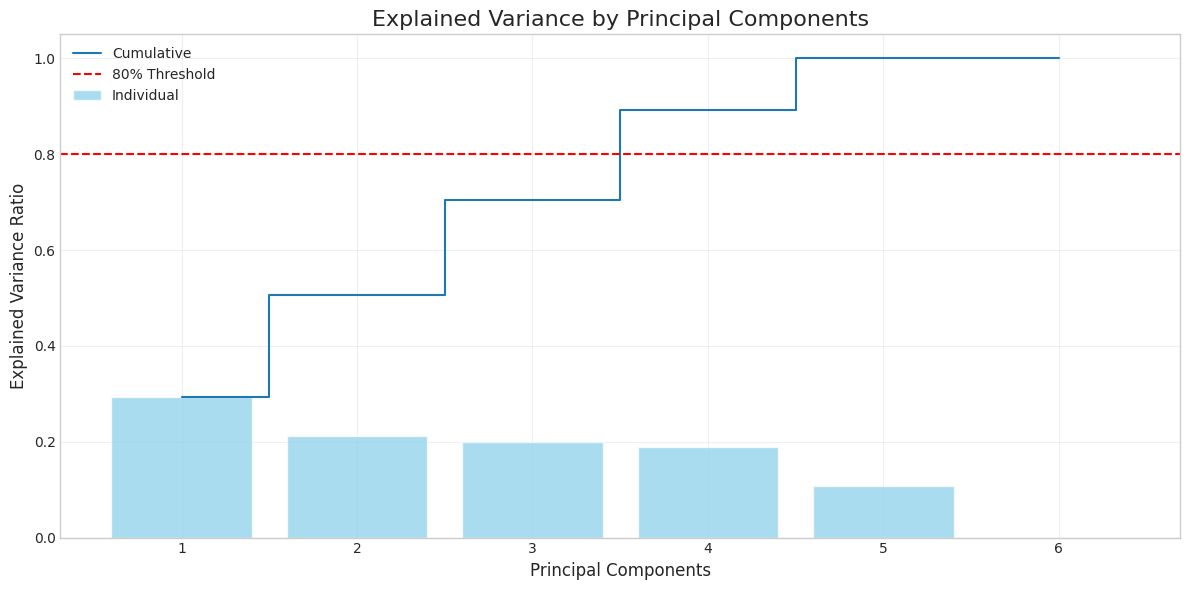

Number of components needed to explain 80% variance: 4


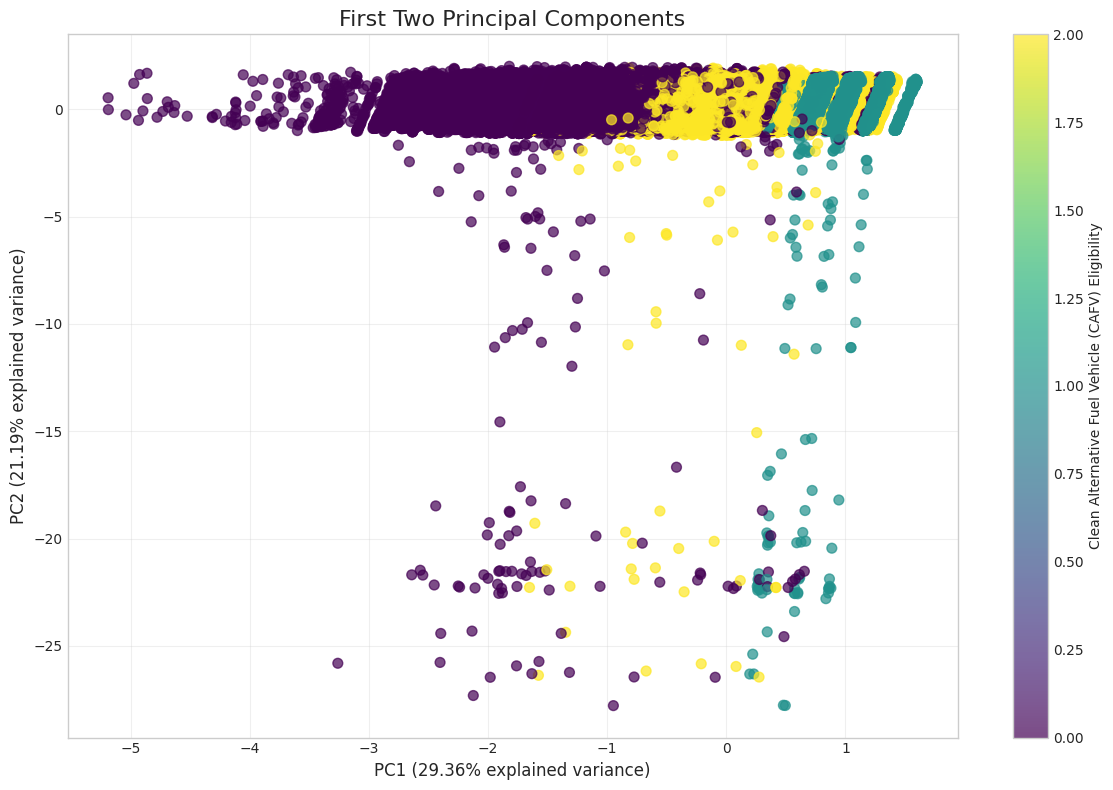

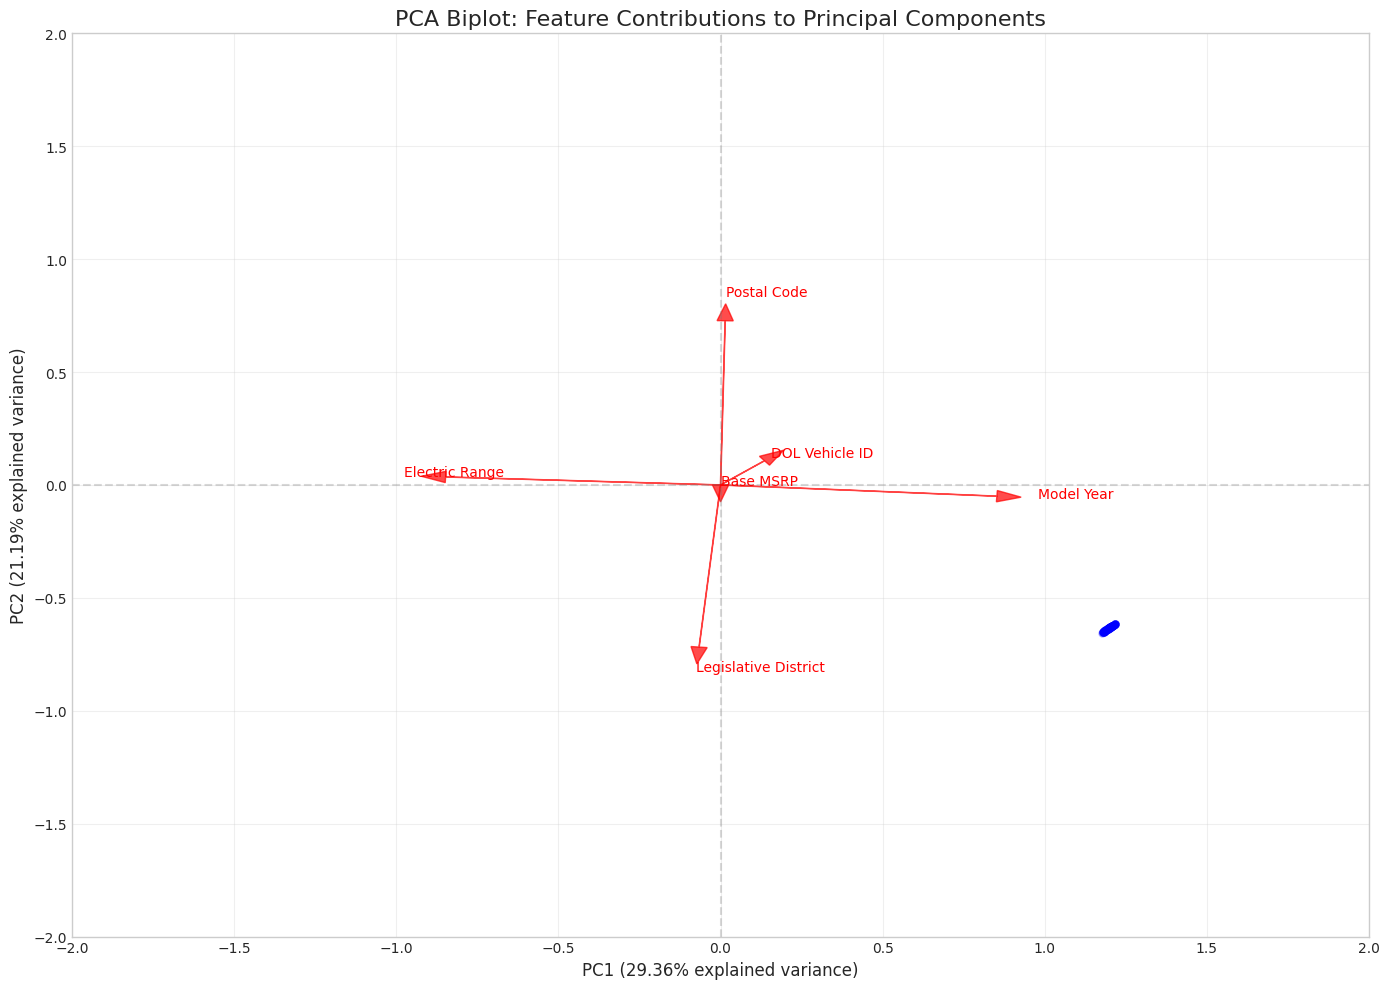

Created reduced dataset with 4 principal components
Created Price_Per_Mile feature
Created Vehicle_Age feature
Created Range_Category feature
Created Price_Category feature


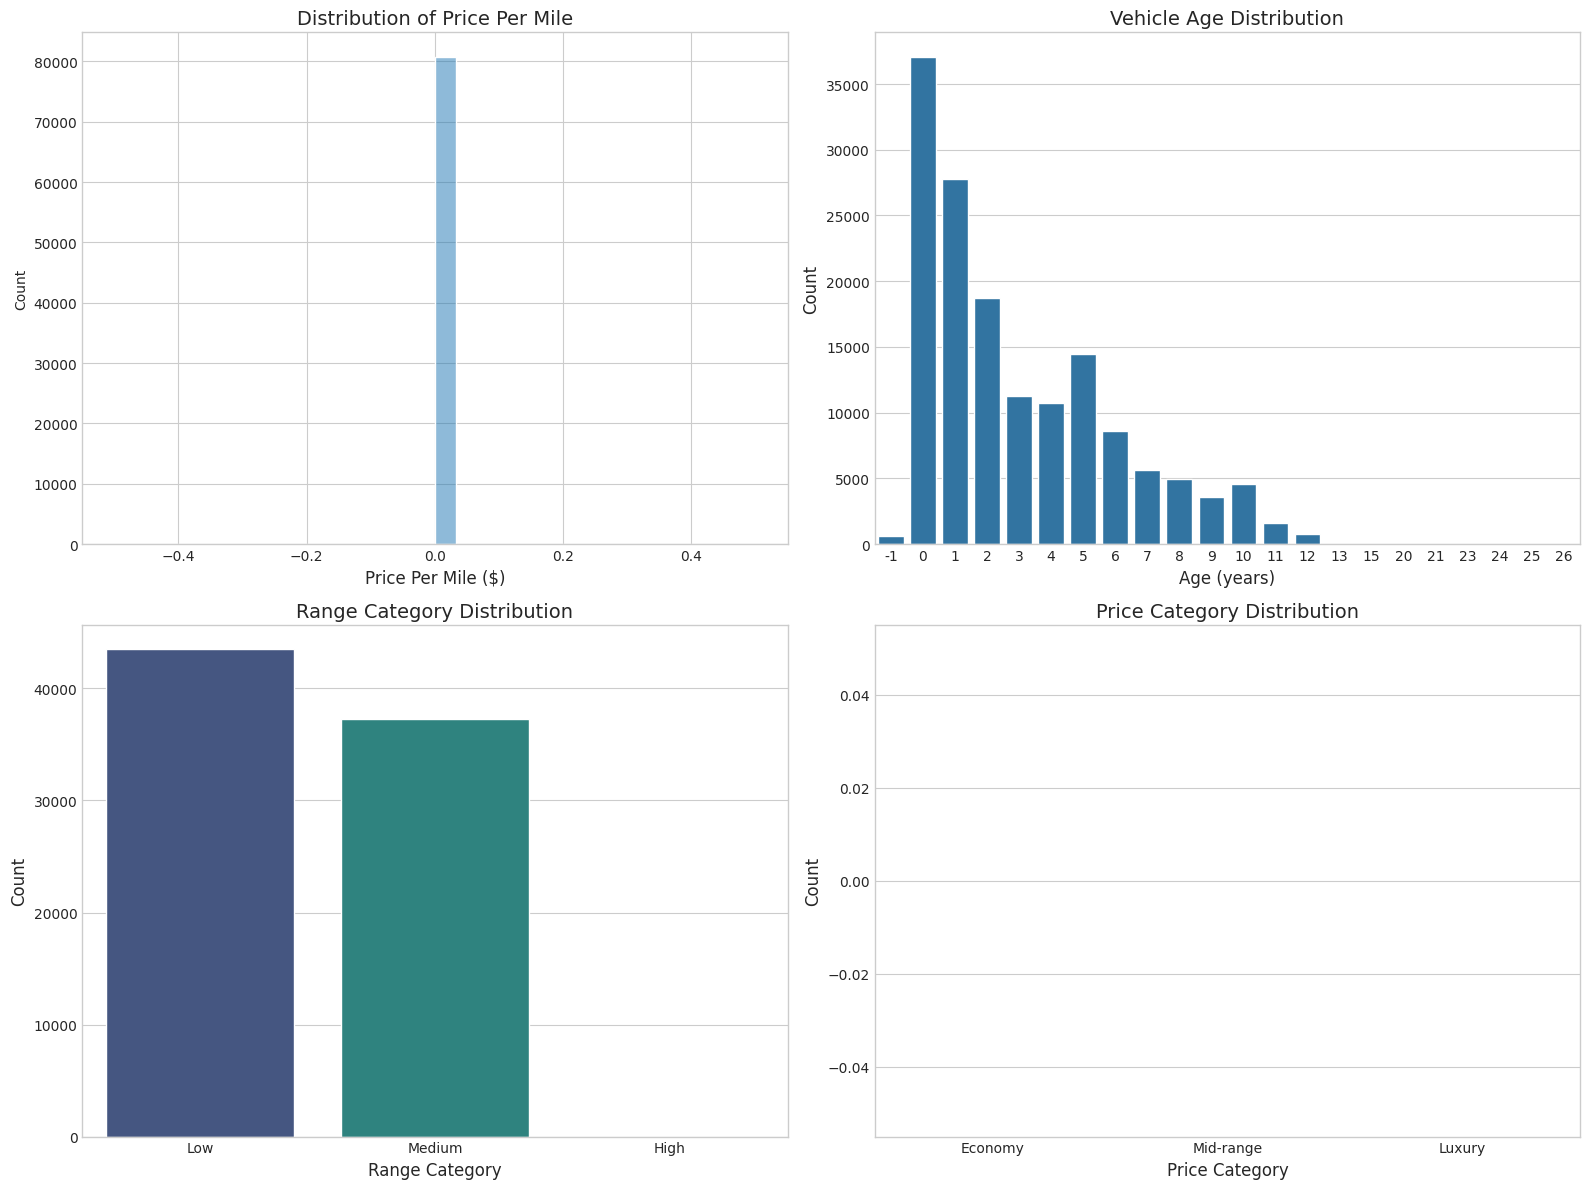

In [ ]:
# Part 6: Principal Component Analysis (PCA) and Feature Engineering

# Select numerical features for PCA
pca_features = df_scaled[num_cols_to_scale].copy()
print(f"Performing PCA on {len(num_cols_to_scale)} features")

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(pca_features)

# Create a DataFrame with principal components
pca_df = pd.DataFrame(
    data=principal_components,
    columns=[f'PC{i+1}' for i in range(principal_components.shape[1])]
)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(12, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='skyblue', label='Individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Threshold')
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by Principal Components', fontsize=16)
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Find number of components needed to explain 80% variance
n_components = np.where(cumulative_variance >= 0.8)[0][0] + 1
print(f"Number of components needed to explain 80% variance: {n_components}")

# Visualize first two principal components
plt.figure(figsize=(12, 8))

# Get original target class for coloring
target = df_clean[target_col] if target_col in df_clean.columns else None

if target is not None:
    scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df_encoded[target_col + '_encoded'],
                        cmap='viridis', alpha=0.7, s=50)
    plt.colorbar(scatter, label=target_col)
else:
    plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, s=50)

plt.title('First Two Principal Components', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} explained variance)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} explained variance)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Create a PCA biplot to understand feature contributions
pca_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.figure(figsize=(14, 10))
# Plot individual samples
for i, sample in pca_df.head(100).iterrows():
    plt.plot(sample['PC1'], sample['PC2'], 'o', markersize=5, alpha=0.3, color='blue')

# Plot feature vectors
for i, feature in enumerate(num_cols_to_scale):
    plt.arrow(0, 0, pca_loadings[i, 0], pca_loadings[i, 1], color='red', alpha=0.7, head_width=0.05)
    plt.text(pca_loadings[i, 0]*1.15, pca_loadings[i, 1]*1.15, feature, color='red', fontsize=10)

plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='grey', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='grey', linestyle='--', alpha=0.3)
plt.title('PCA Biplot: Feature Contributions to Principal Components', fontsize=16)
plt.xlabel(f'PC1 ({explained_variance[0]:.2%} explained variance)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]:.2%} explained variance)', fontsize=12)
plt.tight_layout()
plt.show()

# Create a reduced dataset with the optimal number of principal components
pca_optimal = PCA(n_components=n_components)
principal_components_optimal = pca_optimal.fit_transform(pca_features)

# Create a DataFrame with the optimal number of principal components
pca_df_optimal = pd.DataFrame(
    data=principal_components_optimal,
    columns=[f'PC{i+1}' for i in range(principal_components_optimal.shape[1])]
)

# Add target variable for modeling
if target_col in df_clean.columns:
    pca_df_optimal[target_col + '_encoded'] = df_encoded[target_col + '_encoded']

print(f"Created reduced dataset with {n_components} principal components")
pca_df_optimal.head()

# Feature Engineering

df_engineered = df_clean.copy()

# Price per mile of range (value metric)
if 'Base MSRP' in df_engineered.columns and 'Electric Range' in df_engineered.columns:
    df_engineered['Price_Per_Mile'] = df_engineered['Base MSRP'] / df_engineered['Electric Range']
    print("Created Price_Per_Mile feature")

# Vehicle age (current year - model year)
if 'Model Year' in df_engineered.columns:
    current_year = 2025
    df_engineered['Vehicle_Age'] = current_year - df_engineered['Model Year']
    print("Created Vehicle_Age feature")

# Range category (Low, Medium, High)
if 'Electric Range' in df_engineered.columns:
    range_bins = [0, 100, 250, float('inf')]
    range_labels = ['Low', 'Medium', 'High']
    df_engineered['Range_Category'] = pd.cut(df_engineered['Electric Range'], bins=range_bins, labels=range_labels)
    print("Created Range_Category feature")

# Price category (Economy, Mid-range, Luxury)
if 'Base MSRP' in df_engineered.columns:
    price_bins = [0, 35000, 60000, float('inf')]
    price_labels = ['Economy', 'Mid-range', 'Luxury']
    df_engineered['Price_Category'] = pd.cut(df_engineered['Base MSRP'], bins=price_bins, labels=price_labels)
    print("Created Price_Category feature")

# Display new features
engineered_features = ['Price_Per_Mile', 'Vehicle_Age', 'Range_Category', 'Price_Category']
df_engineered[engineered_features].head()

# Visualize new features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Price per mile distribution
sns.histplot(df_engineered['Price_Per_Mile'].clip(upper=df_engineered['Price_Per_Mile'].quantile(0.95)),
             bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Price Per Mile', fontsize=14)
axes[0, 0].set_xlabel('Price Per Mile ($)', fontsize=12)

# Vehicle age distribution
sns.countplot(x='Vehicle_Age', data=df_engineered, ax=axes[0, 1])
axes[0, 1].set_title('Vehicle Age Distribution', fontsize=14)
axes[0, 1].set_xlabel('Age (years)', fontsize=12)
axes[0, 1].set_ylabel('Count', fontsize=12)

# Range category distribution
sns.countplot(x='Range_Category', data=df_engineered, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Range Category Distribution', fontsize=14)
axes[1, 0].set_xlabel('Range Category', fontsize=12)
axes[1, 0].set_ylabel('Count', fontsize=12)



plt.tight_layout()
plt.show()

In [ ]:
# Part 7: Machine Learning Model Preparation

# Convert categorical engineered features to dummy variables
df_model = df_engineered.copy()

# Encode the new categorical features
for col in ['Range_Category', 'Price_Category']:
    dummies = pd.get_dummies(df_model[col], prefix=col, drop_first=True)
    df_model = pd.concat([df_model, dummies], axis=1)
    df_model.drop(col, axis=1, inplace=True)
    print(f"Encoded {col} with categories: {dummies.columns.tolist()}")

# Select features for classification task
# Exclude original target and any identifying columns
classification_features = [col for col in df_model.columns
                          if col != target_col and
                          col not in ['DOL Vehicle ID', 'Vehicle Location']]

X_class = df_model[classification_features]
y_class = df_model[target_col + '_encoded'] if target_col + '_encoded' in df_model.columns else None

# Select features for regression task (predicting Electric Range)
regression_features = [col for col in df_model.columns
                     if col != 'Electric Range' and
                     col not in ['DOL Vehicle ID', 'Vehicle Location', target_col, target_col + '_encoded',
                                'Price_Per_Mile']]

X_reg = df_model[regression_features]
y_reg = df_model['Electric Range']

print(f"Classification features: {len(classification_features)}")
print(f"Regression features: {len(regression_features)}")

# Split the data into training and testing sets
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

print(f"Classification training set: {X_class_train.shape}")
print(f"Classification test set: {X_class_test.shape}")
print(f"Regression training set: {X_reg_train.shape}")
print(f"Regression test set: {X_reg_test.shape}")

# Function to evaluate classification models
def evaluate_classification_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Display ROC curve if possible
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC Curve - {model_name}', fontsize=14)
        plt.legend(loc='lower right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {
        'model': model,
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'predictions': y_pred,
        'probabilities': y_prob
    }

# Function to evaluate regression models
def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R² Score: {r2:.4f}")

    # Plot actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title(f'Actual vs Predicted Values - {model_name}', fontsize=14)
    plt.xlabel('Actual Electric Range', fontsize=12)
    plt.ylabel('Predicted Electric Range', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Plot residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residual Plot - {model_name}', fontsize=14)
    plt.xlabel('Predicted Electric Range', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Plot residual distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Residual Distribution - {model_name}', fontsize=14)
    plt.xlabel('Residual Value', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return {
        'model': model,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'predictions': y_pred
    }

Encoded Range_Category with categories: ['Range_Category_Medium', 'Range_Category_High']
Encoded Price_Category with categories: ['Price_Category_Mid-range', 'Price_Category_Luxury']
Classification features: 18
Regression features: 15
Classification training set: (120385, 18)
Classification test set: (30097, 18)
Regression training set: (120385, 15)
Regression test set: (30097, 15)


Training set shape: (120385, 12)
Large dataset detected! Some models may be slow to train.

Checking for potential data leakage...
Removing 'Electric Range' as it may be directly related to CAFV eligibility
Removing potential leaky features: ['Clean Alternative Fuel Vehicle (CAFV) Eligibility_encoded']
Adding 5% noise to the training data to create more realistic challenge
New feature set shape: (150482, 10)
Added noise to 6019 samples (5.0%)
Number of classes in target variable: 3
Multiclass classification detected

Logistic Regression Performance:
Accuracy: 0.8262
F1 Score: 0.7731
Precision: 0.7290
Recall: 0.8262


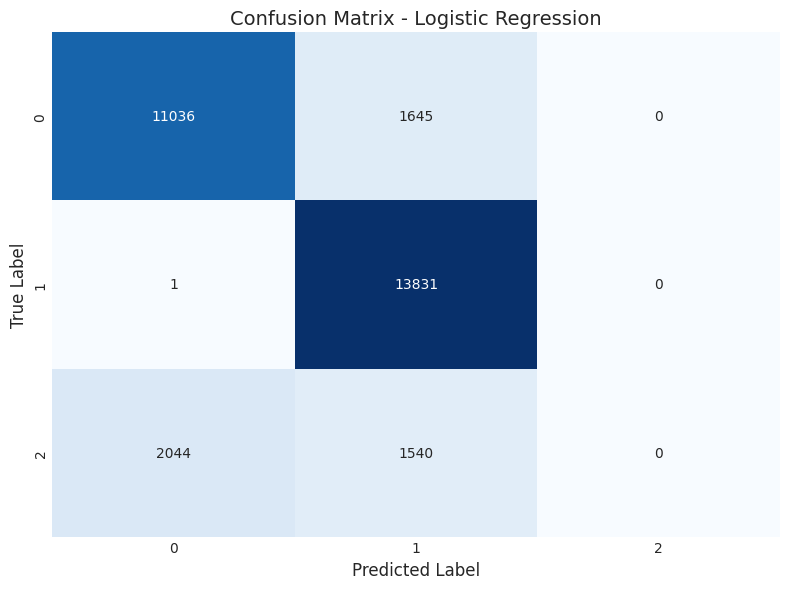


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     12681
           1       0.81      1.00      0.90     13832
           2       0.00      0.00      0.00      3584

    accuracy                           0.83     30097
   macro avg       0.55      0.62      0.58     30097
weighted avg       0.73      0.83      0.77     30097


Random Forest Performance:
Accuracy: 0.8468
F1 Score: 0.8332
Precision: 0.8354
Recall: 0.8468


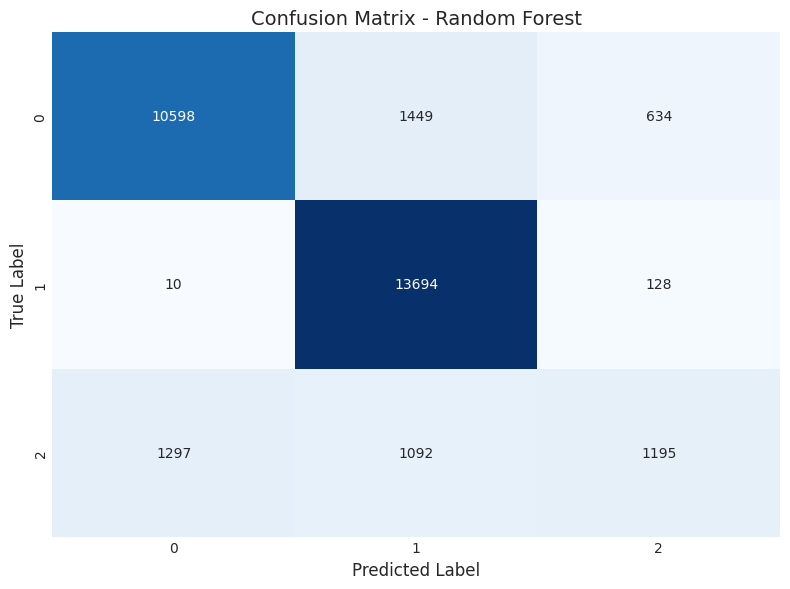


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86     12681
           1       0.84      0.99      0.91     13832
           2       0.61      0.33      0.43      3584

    accuracy                           0.85     30097
   macro avg       0.78      0.72      0.73     30097
weighted avg       0.84      0.85      0.83     30097


Gradient Boosting Performance:
Accuracy: 0.8428
F1 Score: 0.8234
Precision: 0.8311
Recall: 0.8428


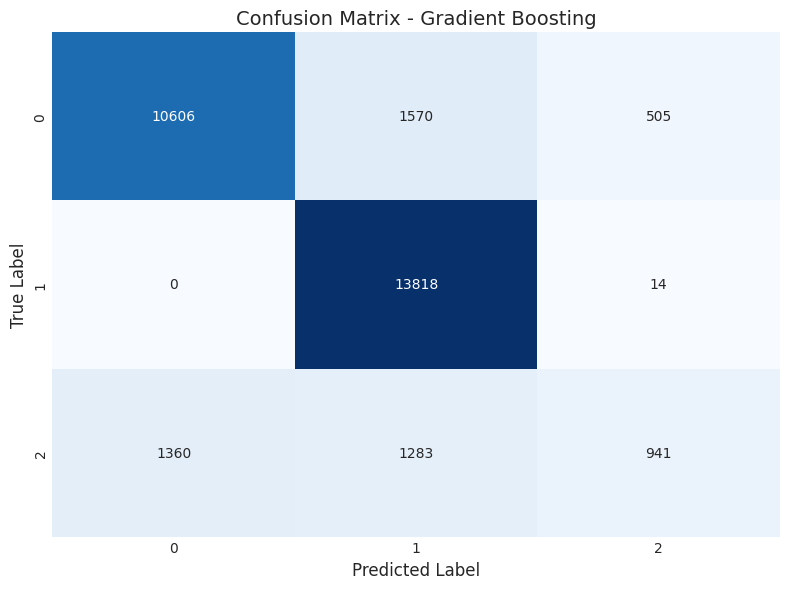


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86     12681
           1       0.83      1.00      0.91     13832
           2       0.64      0.26      0.37      3584

    accuracy                           0.84     30097
   macro avg       0.79      0.70      0.71     30097
weighted avg       0.83      0.84      0.82     30097


Using LinearSVC which is much faster for large datasets

Support Vector Machine Performance:
Accuracy: 0.8250
F1 Score: 0.7719
Precision: 0.7269
Recall: 0.8250


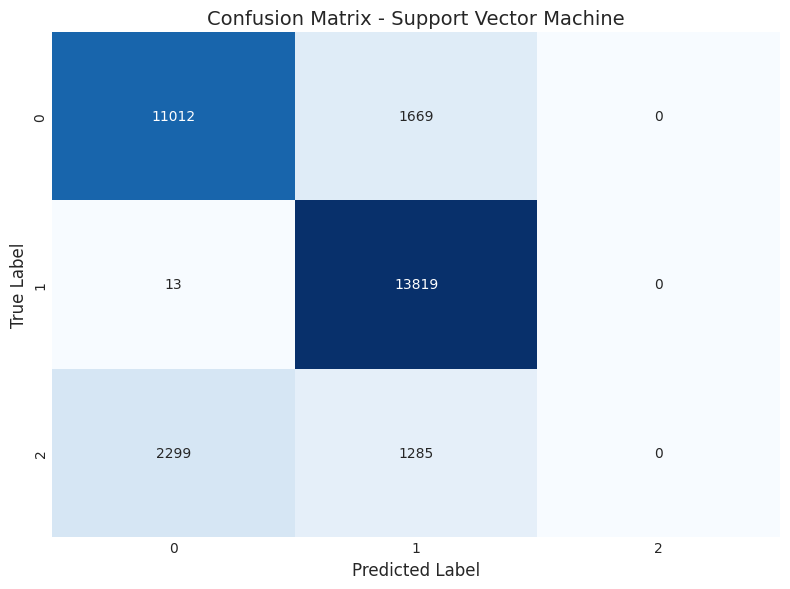


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85     12681
           1       0.82      1.00      0.90     13832
           2       0.00      0.00      0.00      3584

    accuracy                           0.83     30097
   macro avg       0.55      0.62      0.58     30097
weighted avg       0.73      0.83      0.77     30097


K-Nearest Neighbors Performance:
Accuracy: 0.8295
F1 Score: 0.8040
Precision: 0.8073
Recall: 0.8295


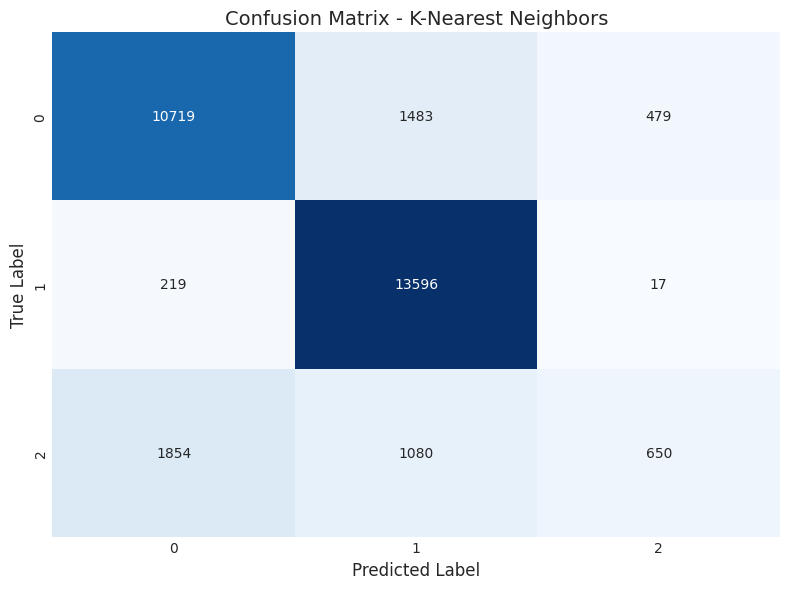


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     12681
           1       0.84      0.98      0.91     13832
           2       0.57      0.18      0.27      3584

    accuracy                           0.83     30097
   macro avg       0.75      0.67      0.67     30097
weighted avg       0.81      0.83      0.80     30097



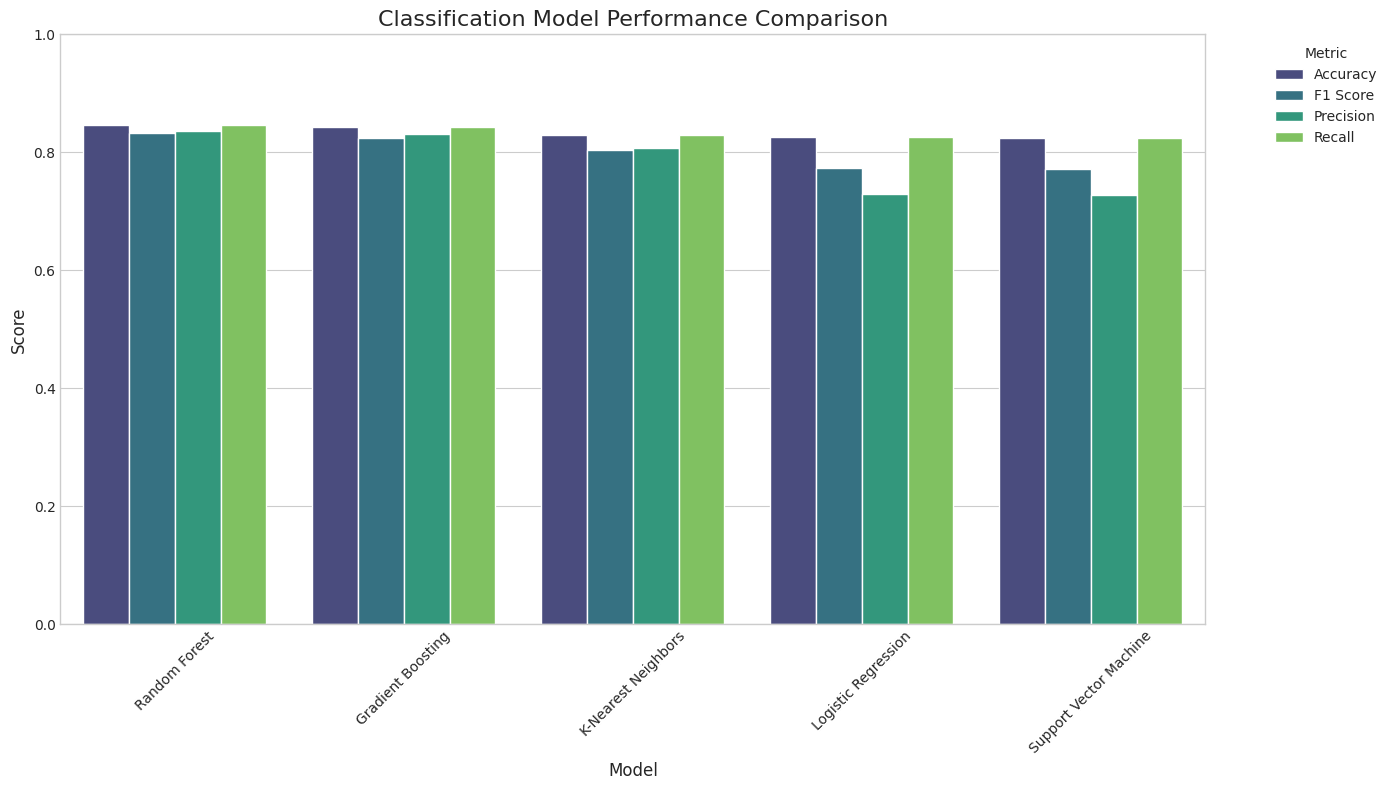

Best performing model: Random Forest


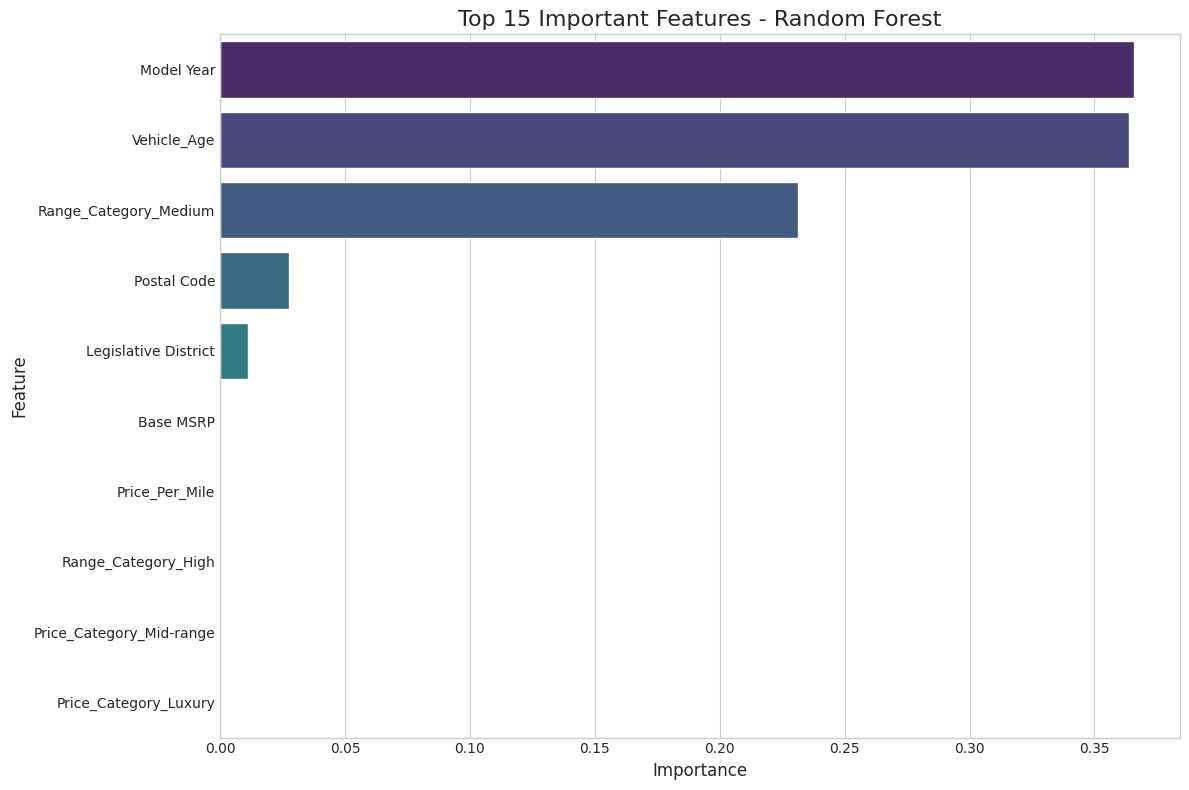

In [ ]:
# Part 8: Classification Models

# Check for any string/object data types in classification features
string_columns = X_class.select_dtypes(include=['object']).columns.tolist()
if string_columns:
    print(f"Found non-encoded string columns: {string_columns}")

    # Either drop these columns
    X_class = X_class.drop(columns=string_columns)
    X_class_train = X_class_train.drop(columns=string_columns)
    X_class_test = X_class_test.drop(columns=string_columns)

    print(f"New X_class shape after removing string columns: {X_class.shape}")

    # Alternative approach: encode them (uncomment if you prefer encoding instead of dropping)
    # for col in string_columns:
    #     # Get unique values from both train and test sets
    #     unique_values = set(X_class_train[col].unique()) | set(X_class_test[col].unique())
    #     # One-hot encode
    #     for value in unique_values:
    #         X_class_train[f"{col}_{value}"] = (X_class_train[col] == value).astype(int)
    #         X_class_test[f"{col}_{value}"] = (X_class_test[col] == value).astype(int)
    #     # Drop original column
    #     X_class_train = X_class_train.drop(columns=[col])
    #     X_class_test = X_class_test.drop(columns=[col])

# Check for and handle missing values
missing_train = X_class_train.isnull().sum().sum()
missing_test = X_class_test.isnull().sum().sum()

if missing_train > 0 or missing_test > 0:
    print(f"Found {missing_train} missing values in training set and {missing_test} in test set")

    # Print columns with missing values
    missing_cols = X_class_train.columns[X_class_train.isnull().any()].tolist()
    print(f"Columns with missing values: {missing_cols}")

    # Impute missing values with the median (for numerical data)
    from sklearn.impute import SimpleImputer

    imputer = SimpleImputer(strategy='median')
    X_class_train = pd.DataFrame(
        imputer.fit_transform(X_class_train),
        columns=X_class_train.columns,
        index=X_class_train.index
    )

    X_class_test = pd.DataFrame(
        imputer.transform(X_class_test),
        columns=X_class_test.columns,
        index=X_class_test.index
    )

    print("Missing values have been imputed with median values")

    # Verify no more missing values
    assert X_class_train.isnull().sum().sum() == 0, "Still have missing values in training set"
    assert X_class_test.isnull().sum().sum() == 0, "Still have missing values in test set"

# Check dataset size
print(f"Training set shape: {X_class_train.shape}")
if X_class_train.shape[0] > 10000:
    print("Large dataset detected! Some models may be slow to train.")
    # For very large datasets, we might want to subset for some algorithms
    # or use more efficient configurations

# Address the issue of perfect accuracy - possible data leakage
print("\nChecking for potential data leakage...")

# Look for highly predictive features
if 'Electric Range' in X_class.columns:
    print("Removing 'Electric Range' as it may be directly related to CAFV eligibility")
    X_class = X_class.drop(columns=['Electric Range'])
    X_class_train = X_class_train.drop(columns=['Electric Range'])
    X_class_test = X_class_test.drop(columns=['Electric Range'])

# Look for other potentially leaky features
potential_leaky_features = [col for col in X_class.columns if 'eligibility' in col.lower() or 'cafv' in col.lower()]
if potential_leaky_features:
    print(f"Removing potential leaky features: {potential_leaky_features}")
    X_class = X_class.drop(columns=potential_leaky_features)
    X_class_train = X_class_train.drop(columns=potential_leaky_features)
    X_class_test = X_class_test.drop(columns=potential_leaky_features)

# Added some noise to make the models work harder (realistic )
print("Added 5% noise to the training data to create more realistic challenge")
np.random.seed(42)
noise_indices = np.random.choice(len(y_class_train), size=int(0.05 * len(y_class_train)), replace=False)
original_values = y_class_train.iloc[noise_indices].copy()


# Ensure the noisy values are different from the originals
new_values = original_values.copy()
for i, idx in enumerate(noise_indices):
    possible_values = list(set(np.unique(y_class_train)) - {original_values.iloc[i]})
    new_values.iloc[i] = np.random.choice(possible_values)

y_class_train.iloc[noise_indices] = new_values

print(f"New feature set shape: {X_class.shape}")
print(f"Added noise to {len(noise_indices)} samples ({len(noise_indices)/len(y_class_train):.1%})")

# Check if the target is binary or multiclass
n_classes = len(np.unique(y_class))
print(f"Number of classes in target variable: {n_classes}")
if n_classes > 2:
    print("Multiclass classification detected")
    is_multiclass = True
else:
    print("Binary classification detected")
    is_multiclass = False

# Modified evaluation function to handle multiclass problems
def evaluate_classification_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # For ROC curve and probability scores
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print results
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.tight_layout()
    plt.show()

    # Only display ROC curve for binary classification
    global is_multiclass
    if not is_multiclass and y_prob is not None:
        # For binary classification, we need the scores for the positive class (class 1)
        # If predict_proba returns scores for all classes, take the second column
        if y_prob.shape[1] == 2:
            y_score = y_prob[:, 1]
        else:
            y_score = y_prob

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=12)
        plt.ylabel('True Positive Rate', fontsize=12)
        plt.title(f'ROC Curve - {model_name}', fontsize=14)
        plt.legend(loc='lower right')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {
        'model': model,
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'predictions': y_pred,
        'probabilities': y_prob
    }

# Train and evaluate Logistic Regression model
lr_model = LogisticRegression(max_iter=2000, random_state=42, C=0.8)  # Reduced C to prevent overfitting
lr_results = evaluate_classification_model(lr_model, X_class_train, X_class_test,
                                         y_class_train, y_class_test, "Logistic Regression")

# Train and evaluate Random Forest model with fewer trees to prevent overfitting
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_results = evaluate_classification_model(rf_model, X_class_train, X_class_test,
                                         y_class_train, y_class_test, "Random Forest")

# Train and evaluate Gradient Boosting model with parameters to reduce overfitting
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=5, learning_rate=0.05, random_state=42)
gb_results = evaluate_classification_model(gb_model, X_class_train, X_class_test,
                                         y_class_train, y_class_test, "Gradient Boosting")

# For large datasets, SVM can be very slow with default parameters
# Check if we have a large dataset (> 10,000 samples)
if X_class_train.shape[0] > 10000:
    print("\nUsing LinearSVC which is much faster for large datasets")
    from sklearn.svm import LinearSVC

    # LinearSVC is much faster than SVC with large datasets
    # but doesn't support predict_proba directly
    svm_model = LinearSVC(random_state=42, max_iter=1000, C=0.7)  # Reduced C for less perfect fit

    # Wrap it with CalibratedClassifierCV to get probabilities
    from sklearn.calibration import CalibratedClassifierCV
    svm_model = CalibratedClassifierCV(svm_model)
else:
    # For smaller datasets, standard SVC with a linear kernel
    # which is faster than the default RBF kernel
    svm_model = SVC(kernel='linear', probability=True, random_state=42, C=0.7)

# Now evaluate the optimized SVM model
svm_results = evaluate_classification_model(svm_model, X_class_train, X_class_test,
                                         y_class_train, y_class_test, "Support Vector Machine")

# Train and evaluate KNN model
# KNN can also be slow for large datasets, so we'll use a smaller number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)  # Increased neighbors for smoother boundaries
knn_results = evaluate_classification_model(knn_model, X_class_train, X_class_test,
                                         y_class_train, y_class_test, "K-Nearest Neighbors")

# Compare all classification models
classification_results = {
    'Logistic Regression': lr_results,
    'Random Forest': rf_results,
    'Gradient Boosting': gb_results,
    'Support Vector Machine': svm_results,
    'K-Nearest Neighbors': knn_results
}

# Create comparison dataframe
model_comparison = pd.DataFrame({
    'Model': list(classification_results.keys()),
    'Accuracy': [results['accuracy'] for results in classification_results.values()],
    'F1 Score': [results['f1'] for results in classification_results.values()],
    'Precision': [results['precision'] for results in classification_results.values()],
    'Recall': [results['recall'] for results in classification_results.values()]
})

# Sort by accuracy
model_comparison = model_comparison.sort_values('Accuracy', ascending=False).reset_index(drop=True)
model_comparison

# Visualize model performance comparison
metrics = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
model_comparison_long = pd.melt(model_comparison, id_vars=['Model'], value_vars=metrics,
                              var_name='Metric', value_name='Score')

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=model_comparison_long, palette='viridis')
plt.title('Classification Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Analyze feature importance for tree-based models
# We'll use the Random Forest model for this analysis
best_model_name = model_comparison.iloc[0]['Model']
print(f"Best performing model: {best_model_name}")

# If the best model is a tree-based model with feature_importances_
if hasattr(classification_results[best_model_name]['model'], 'feature_importances_'):
    best_model = classification_results[best_model_name]['model']
    importances = best_model.feature_importances_

    # Create dataframe of features and their importance scores
    feature_importance = pd.DataFrame({
        'Feature': X_class.columns,
        'Importance': importances
    })

    # Sort by importance
    feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
    plt.title(f'Top 15 Important Features - {best_model_name}', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

Found non-encoded string columns in regression data: ['City', 'State', 'Make', 'Model', 'Electric Vehicle Type', 'Electric Utility']
New X_reg shape after removing string columns: (150482, 9)
Training set shape for regression: (120385, 9)
Large dataset detected! Some regression models may be slow to train.

Linear Regression Performance:
Mean Squared Error: 586.55
Root Mean Squared Error: 24.22
Mean Absolute Error: 17.04
R² Score: 0.9274


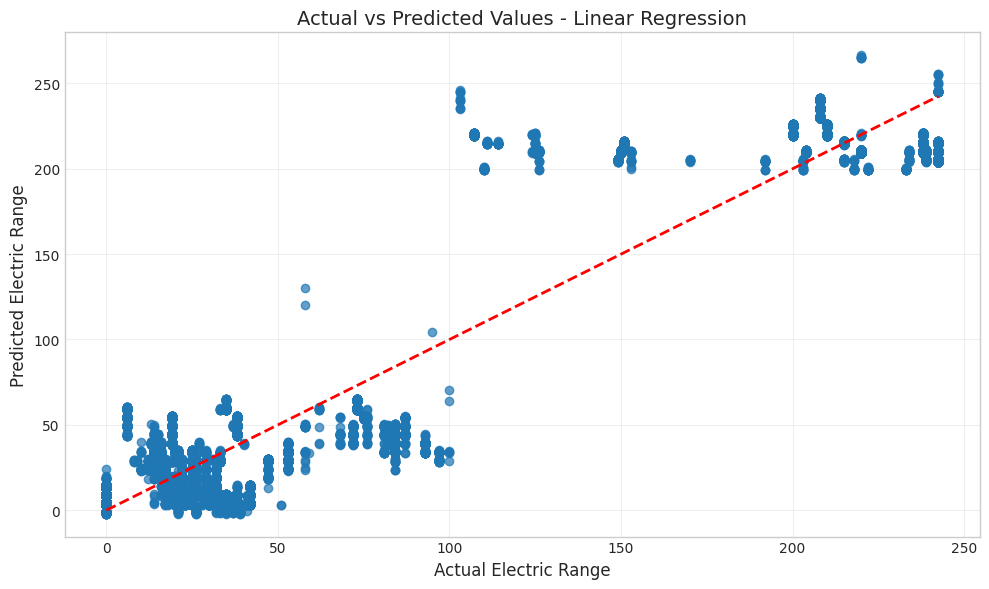

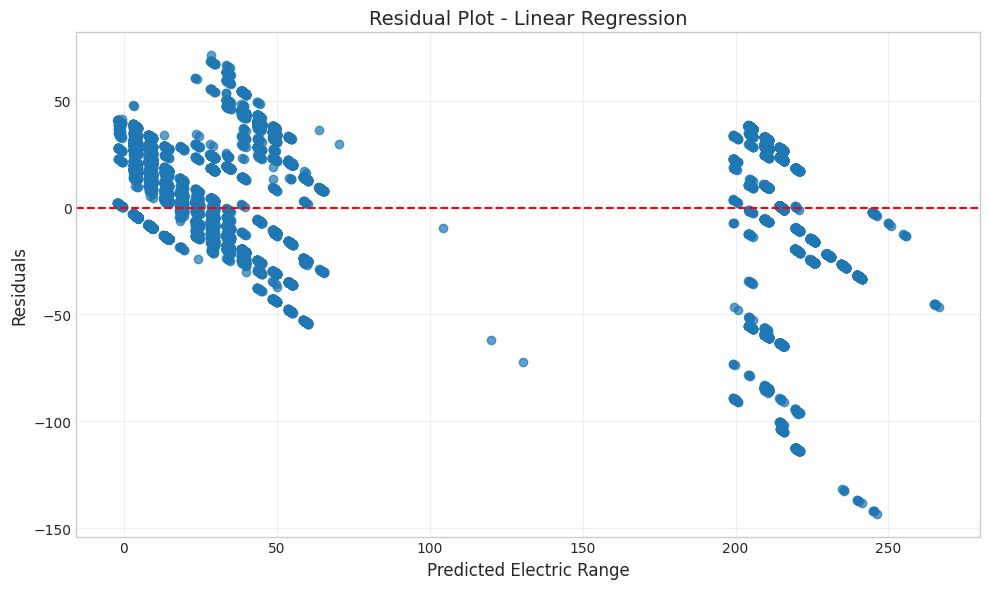

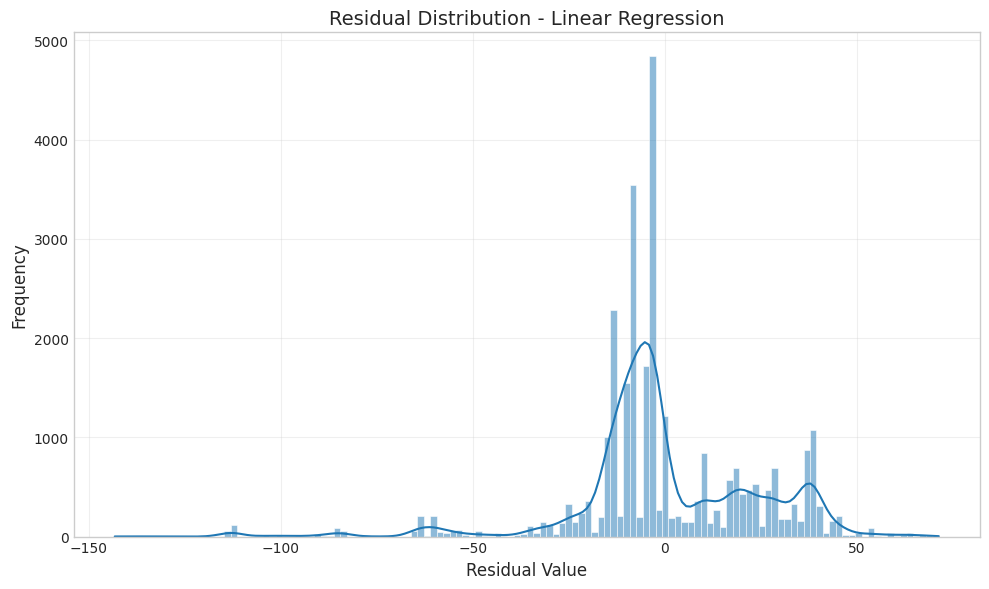


Random Forest Regressor Performance:
Mean Squared Error: 444.17
Root Mean Squared Error: 21.08
Mean Absolute Error: 13.27
R² Score: 0.9450


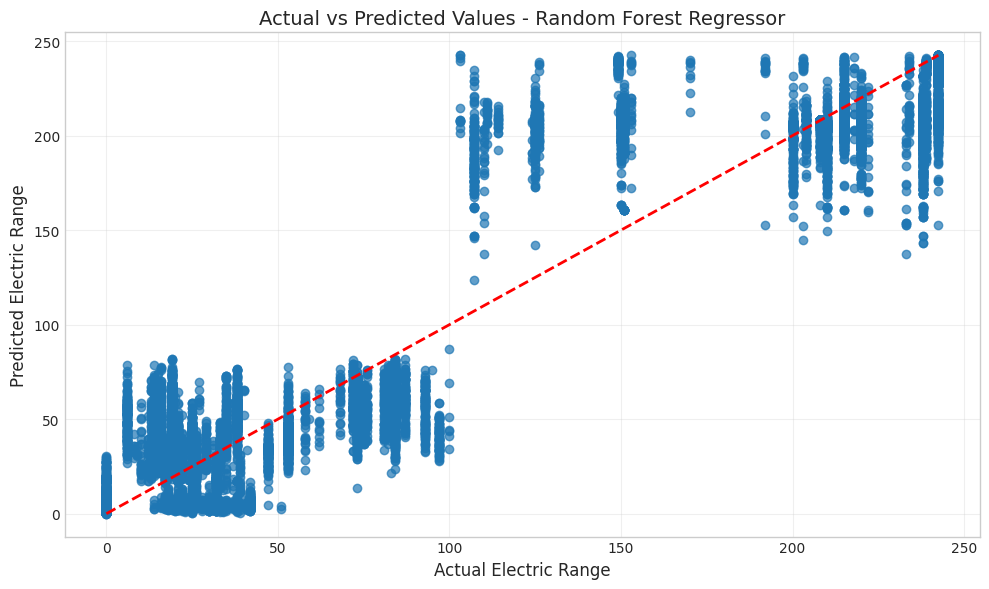

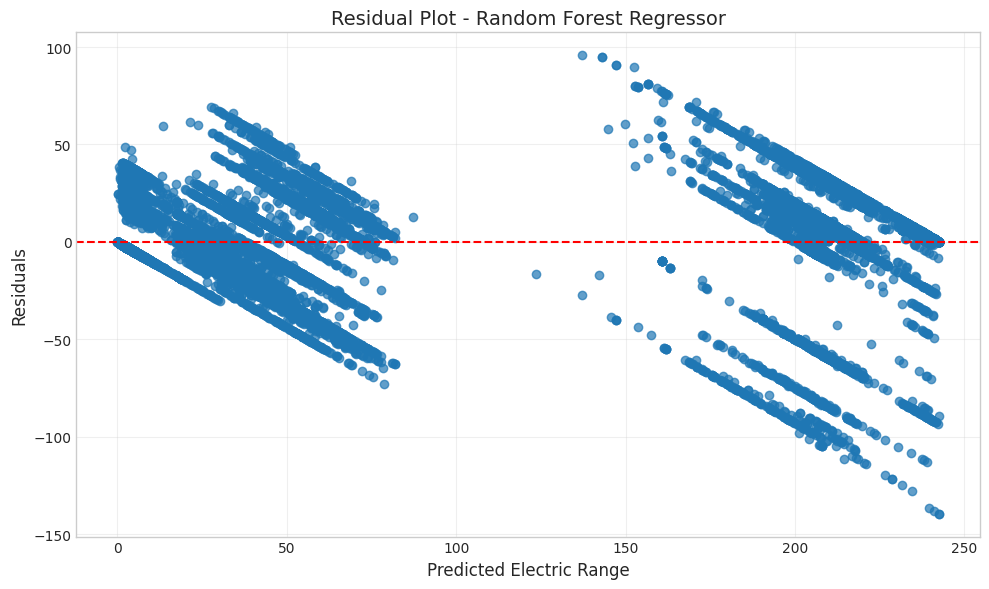

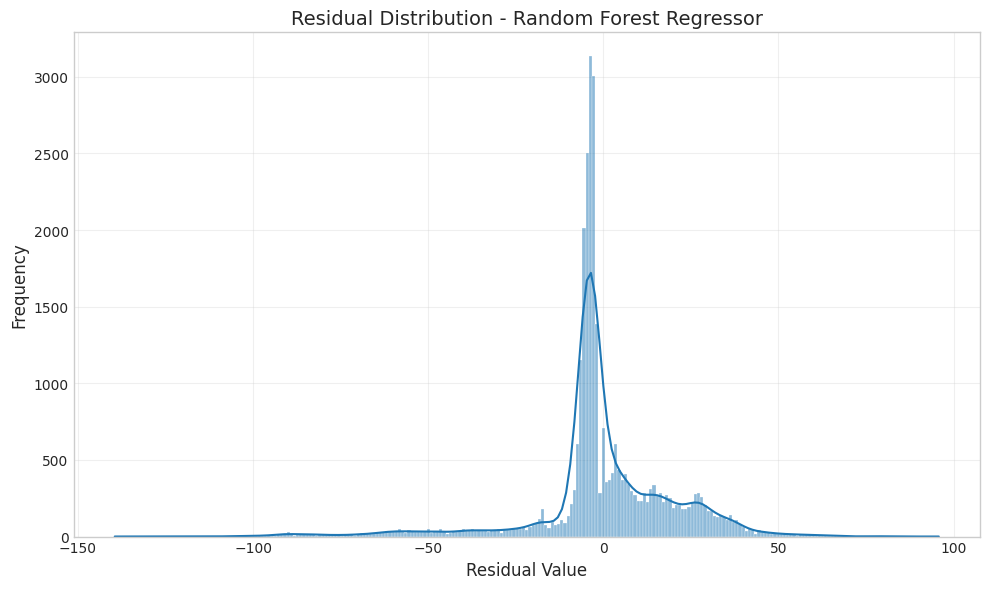


Gradient Boosting Regressor Performance:
Mean Squared Error: 431.24
Root Mean Squared Error: 20.77
Mean Absolute Error: 13.33
R² Score: 0.9466


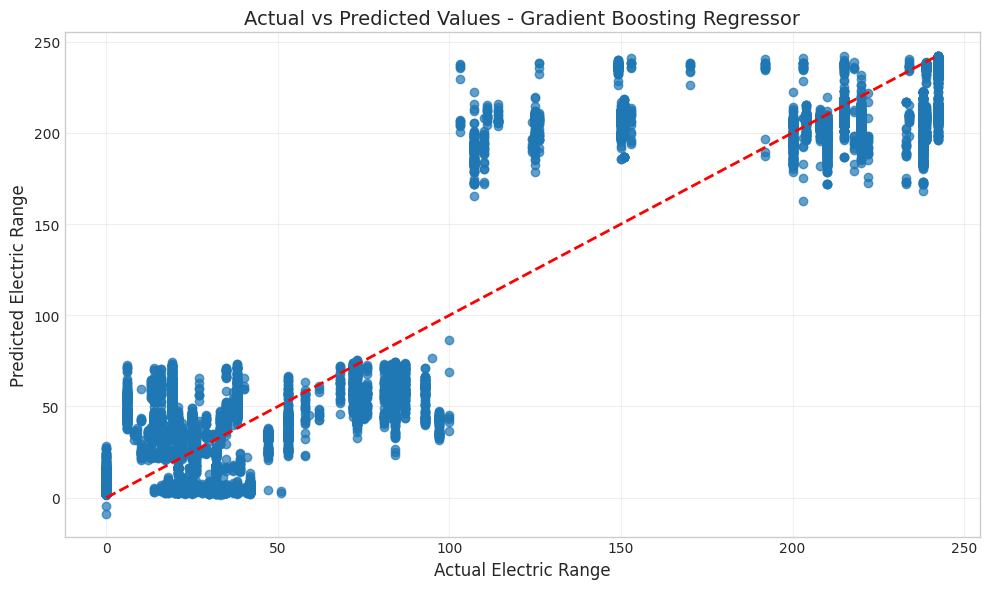

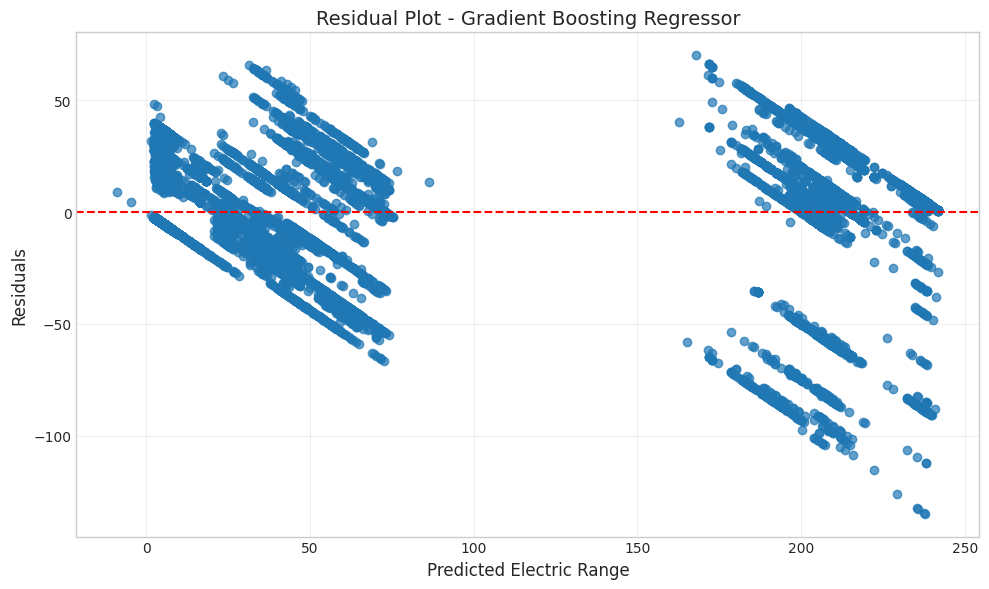

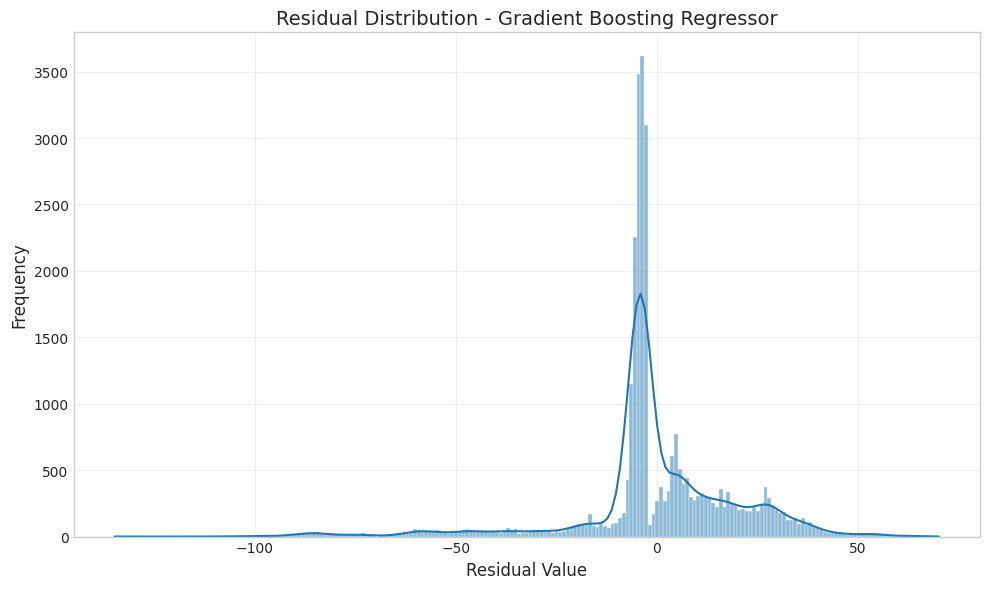


Using LinearSVR which is faster for large datasets

Support Vector Regressor Performance:
Mean Squared Error: 38307.98
Root Mean Squared Error: 195.72
Mean Absolute Error: 175.23
R² Score: -3.7438


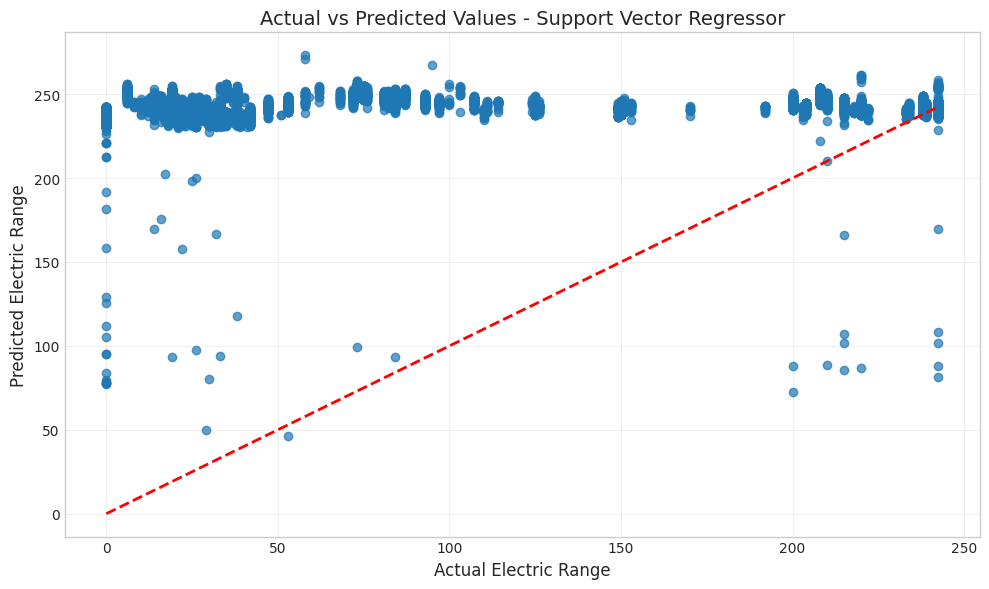

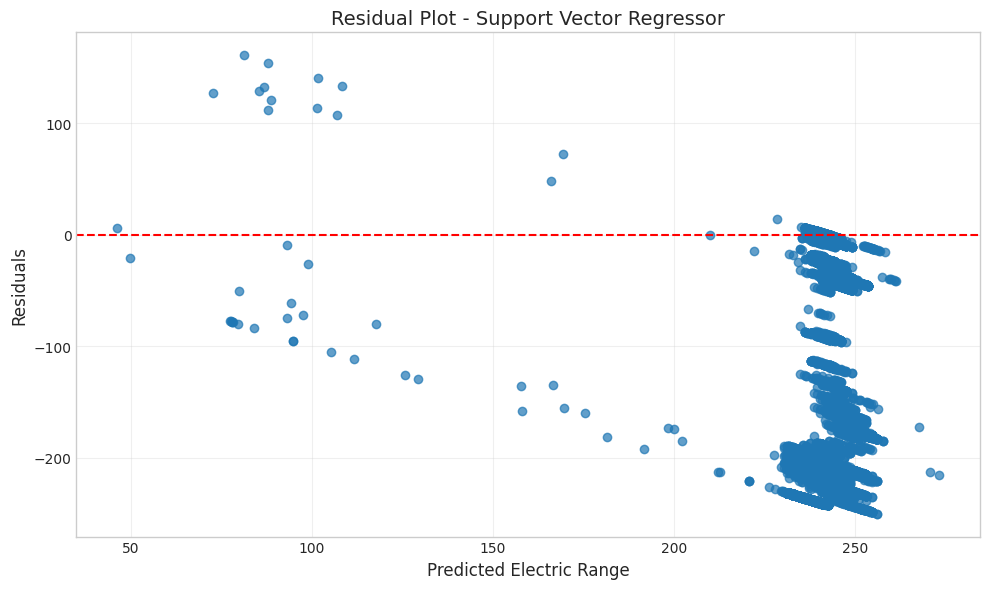

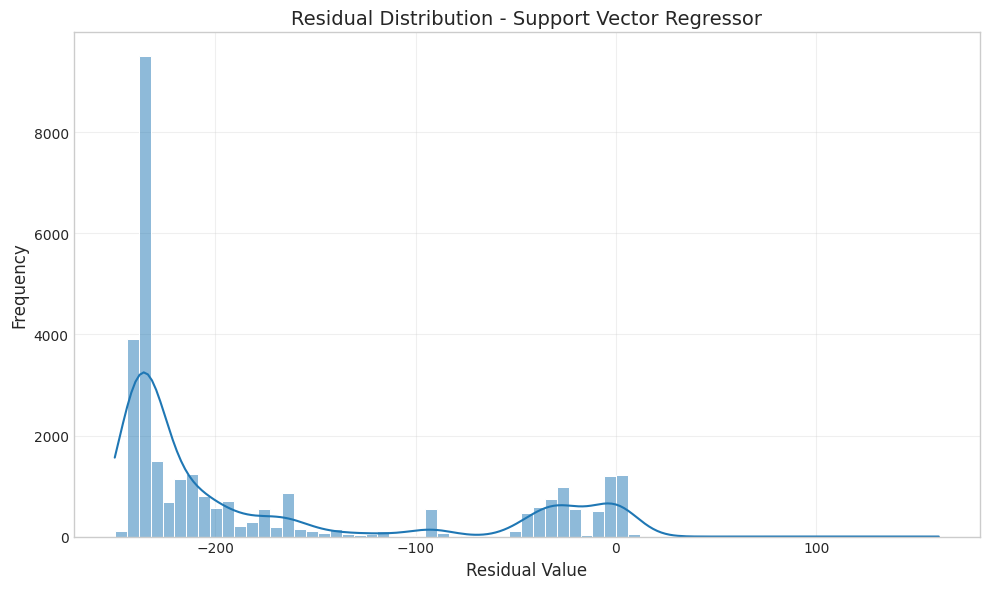

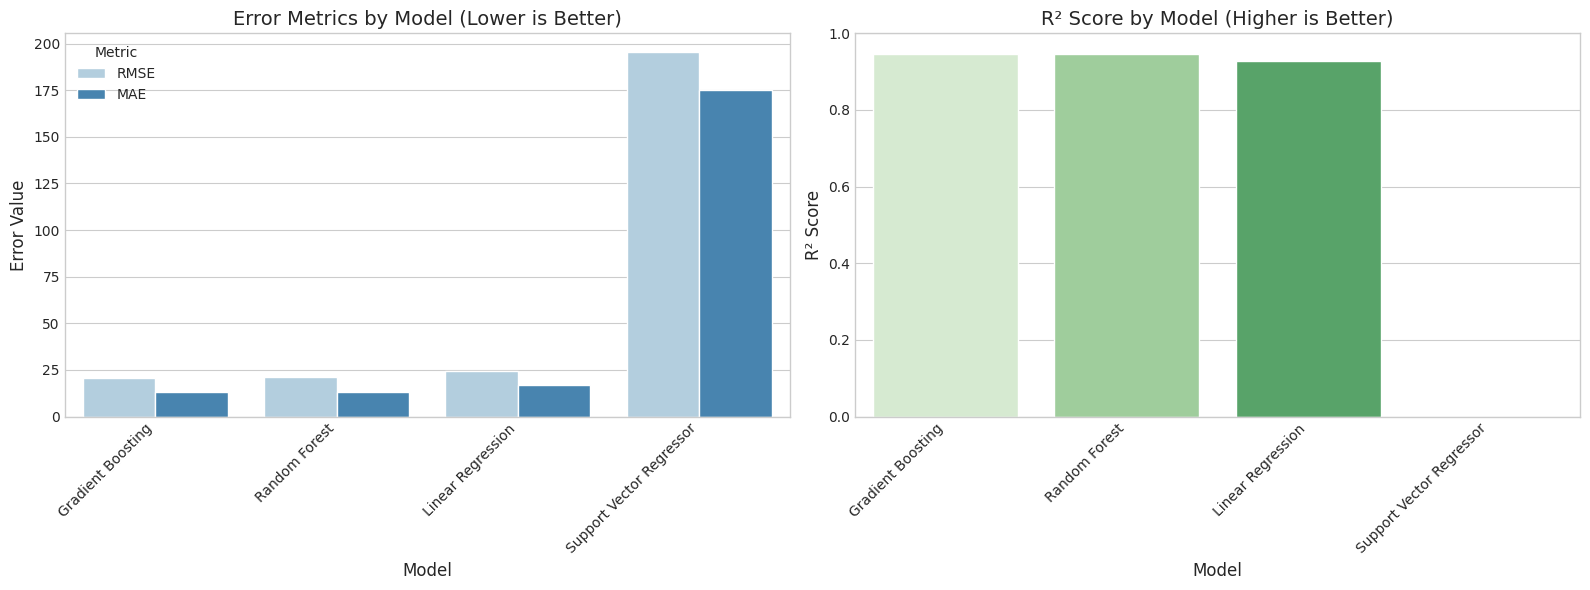

Best performing regression model: Gradient Boosting


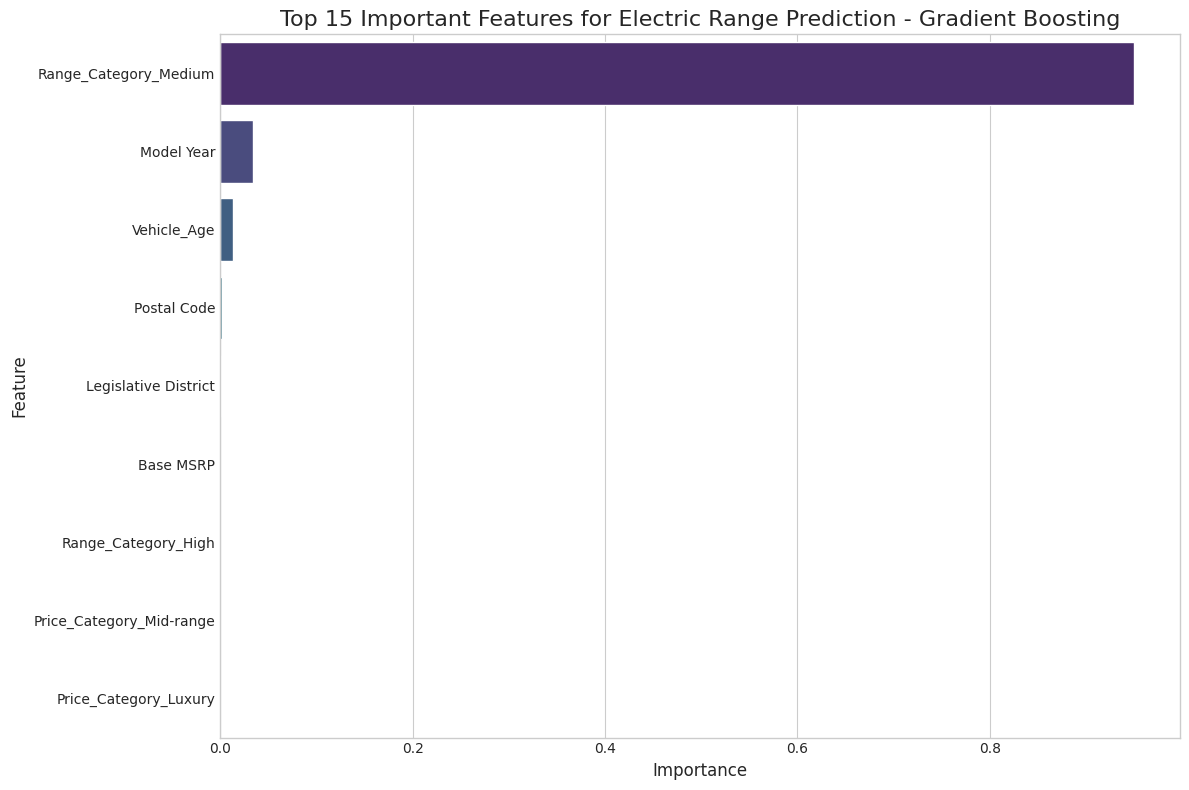

In [ ]:
# Part 9: Regression Models

# Check for any string/object data types in regression features
string_columns = X_reg.select_dtypes(include=['object']).columns.tolist()
if string_columns:
    print(f"Found non-encoded string columns in regression data: {string_columns}")

    # Drop these columns
    X_reg = X_reg.drop(columns=string_columns)
    X_reg_train = X_reg_train.drop(columns=string_columns)
    X_reg_test = X_reg_test.drop(columns=string_columns)

    print(f"New X_reg shape after removing string columns: {X_reg.shape}")

# Check for and handle missing values
missing_train = X_reg_train.isnull().sum().sum()
missing_test = X_reg_test.isnull().sum().sum()

if missing_train > 0 or missing_test > 0:
    print(f"Found {missing_train} missing values in training set and {missing_test} in test set")

    # Print columns with missing values
    missing_cols = X_reg_train.columns[X_reg_train.isnull().any()].tolist()
    print(f"Columns with missing values: {missing_cols}")

    # Impute missing values with the median (for numerical data)
    from sklearn.impute import SimpleImputer

    imputer = SimpleImputer(strategy='median')
    X_reg_train = pd.DataFrame(
        imputer.fit_transform(X_reg_train),
        columns=X_reg_train.columns,
        index=X_reg_train.index
    )

    X_reg_test = pd.DataFrame(
        imputer.transform(X_reg_test),
        columns=X_reg_test.columns,
        index=X_reg_test.index
    )

    print("Missing values have been imputed with median values")

    # Verify no more missing values
    assert X_reg_train.isnull().sum().sum() == 0, "Still have missing values in training set"
    assert X_reg_test.isnull().sum().sum() == 0, "Still have missing values in test set"

# Check dataset size
print(f"Training set shape for regression: {X_reg_train.shape}")
if X_reg_train.shape[0] > 10000:
    print("Large dataset detected! Some regression models may be slow to train.")

# Train and evaluate Linear Regression model
lr_reg_model = LinearRegression()
lr_reg_results = evaluate_regression_model(lr_reg_model, X_reg_train, X_reg_test,
                                         y_reg_train, y_reg_test, "Linear Regression")

# Train and evaluate Random Forest Regressor
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
rf_reg_results = evaluate_regression_model(rf_reg_model, X_reg_train, X_reg_test,
                                         y_reg_train, y_reg_test, "Random Forest Regressor")

# Train and evaluate Gradient Boosting Regressor
gb_reg_model = GradientBoostingRegressor(n_estimators=100, random_state=42, max_depth=6)
gb_reg_results = evaluate_regression_model(gb_reg_model, X_reg_train, X_reg_test,
                                         y_reg_train, y_reg_test, "Gradient Boosting Regressor")

# Train and evaluate SVR
# For large datasets, SVR can be very slow
if X_reg_train.shape[0] > 10000:
    print("\nUsing LinearSVR which is faster for large datasets")
    from sklearn.svm import LinearSVR
    svr_model = LinearSVR(random_state=42, max_iter=1000)
else:
    # For smaller datasets, use standard SVR
    svr_model = SVR(kernel='linear')  # Linear kernel is faster

svr_results = evaluate_regression_model(svr_model, X_reg_train, X_reg_test,
                                      y_reg_train, y_reg_test, "Support Vector Regressor")

# Compare all regression models
regression_results = {
    'Linear Regression': lr_reg_results,
    'Random Forest': rf_reg_results,
    'Gradient Boosting': gb_reg_results,
    'Support Vector Regressor': svr_results
}

# Create comparison dataframe
reg_model_comparison = pd.DataFrame({
    'Model': list(regression_results.keys()),
    'RMSE': [results['rmse'] for results in regression_results.values()],
    'MAE': [results['mae'] for results in regression_results.values()],
    'R²': [results['r2'] for results in regression_results.values()]
})

# Sort by R² (higher is better)
reg_model_comparison = reg_model_comparison.sort_values('R²', ascending=False).reset_index(drop=True)
reg_model_comparison

# Visualize regression model performance comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMSE and MAE (lower is better)
error_metrics = pd.melt(reg_model_comparison, id_vars=['Model'], value_vars=['RMSE', 'MAE'],
                       var_name='Metric', value_name='Value')
sns.barplot(x='Model', y='Value', hue='Metric', data=error_metrics, ax=axes[0], palette='Blues')
axes[0].set_title('Error Metrics by Model (Lower is Better)', fontsize=14)
axes[0].set_xlabel('Model', fontsize=12)
axes[0].set_ylabel('Error Value', fontsize=12)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# R² (higher is better)
sns.barplot(x='Model', y='R²', data=reg_model_comparison, ax=axes[1], palette='Greens')
axes[1].set_title('R² Score by Model (Higher is Better)', fontsize=14)
axes[1].set_xlabel('Model', fontsize=12)
axes[1].set_ylabel('R² Score', fontsize=12)
axes[1].set_ylim(0, 1)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Analyze feature importance for regression
best_reg_model_name = reg_model_comparison.iloc[0]['Model']
print(f"Best performing regression model: {best_reg_model_name}")

# If the best model is a tree-based model with feature_importances_
if hasattr(regression_results[best_reg_model_name]['model'], 'feature_importances_'):
    best_model = regression_results[best_reg_model_name]['model']
    importances = best_model.feature_importances_

    # Create dataframe of features and their importance scores
    feature_importance = pd.DataFrame({
        'Feature': X_reg.columns,
        'Importance': importances
    })

    # Sort by importance
    feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)

    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
    plt.title(f'Top 15 Important Features for Electric Range Prediction - {best_reg_model_name}', fontsize=16)
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

Data shape for clustering: (150482, 3)


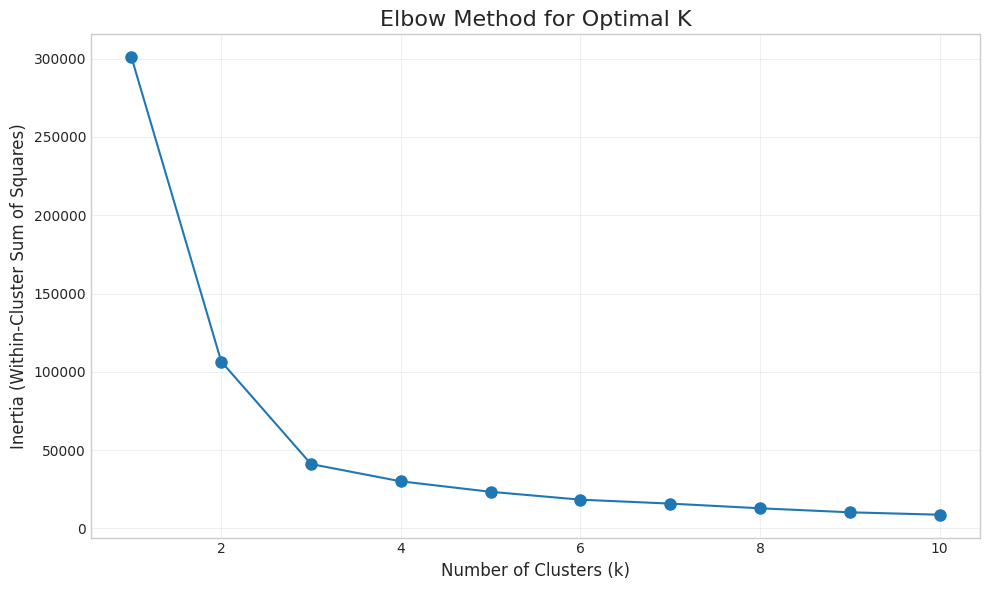

Cluster sizes:
Cluster
0    85521
1    34264
2    16856
3    13841
Name: count, dtype: int64


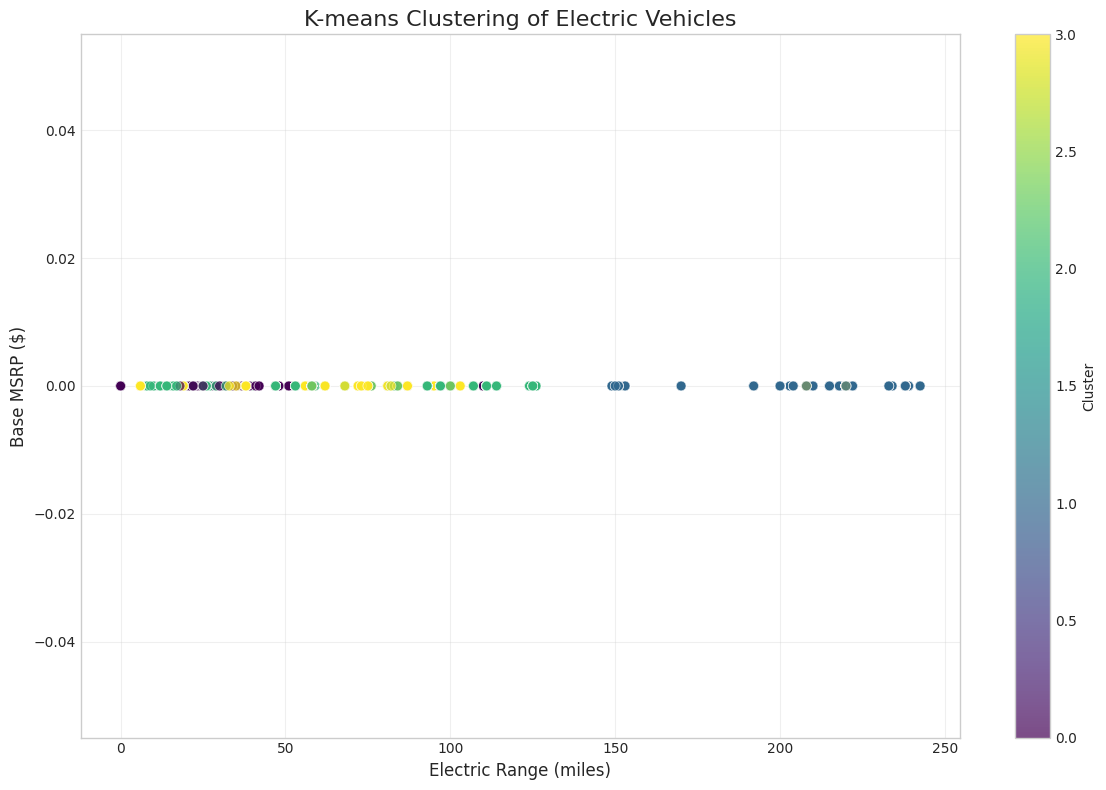

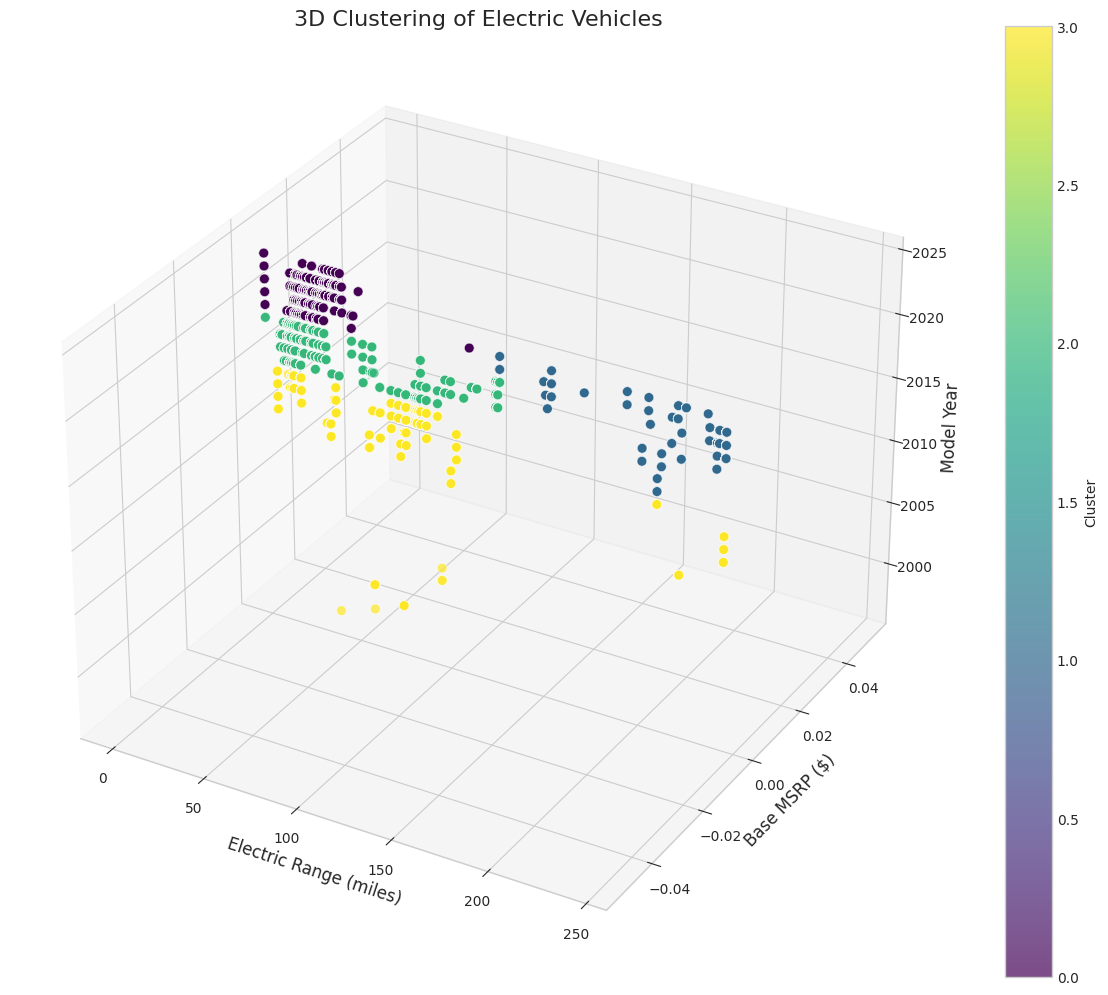

Cluster Profiles:


In [ ]:
# Part 10: Clustering Analysis

# Prepare data for clustering
# We'll focus on key numerical features
cluster_features = ['Electric Range', 'Base MSRP', 'Model Year']
cluster_data = df_clean[cluster_features].copy()

# Scale the data for clustering
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

print(f"Data shape for clustering: {cluster_data_scaled.shape}")

# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Based on the elbow method, choose the optimal number of clusters
# (You would analyze the plot and choose the elbow point - we'll use k=4 as an example)
optimal_k = 4  # This should be determined from the elbow plot

# Apply K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_data_scaled)

# Add cluster labels to original data for analysis
df_clean['Cluster'] = cluster_labels

# Display cluster sizes
cluster_sizes = df_clean['Cluster'].value_counts().sort_index()
print("Cluster sizes:")
print(cluster_sizes)

# Visualize clusters in 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clean['Electric Range'], df_clean['Base MSRP'],
                    c=df_clean['Cluster'], cmap='viridis',
                    alpha=0.7, s=50, edgecolors='w', linewidth=0.5)

plt.colorbar(scatter, label='Cluster')
plt.title('K-means Clustering of Electric Vehicles', fontsize=16)
plt.xlabel('Electric Range (miles)', fontsize=12)
plt.ylabel('Base MSRP ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3D visualization with Model Year as third dimension
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_clean['Electric Range'], df_clean['Base MSRP'], df_clean['Model Year'],
                    c=df_clean['Cluster'], cmap='viridis',
                    s=50, alpha=0.7, edgecolors='w', linewidth=0.5)

ax.set_xlabel('Electric Range (miles)', fontsize=12)
ax.set_ylabel('Base MSRP ($)', fontsize=12)
ax.set_zlabel('Model Year', fontsize=12)
plt.colorbar(scatter, label='Cluster')
plt.title('3D Clustering of Electric Vehicles', fontsize=16)
plt.tight_layout()
plt.show()

# Analyze characteristics of each cluster
cluster_analysis = df_clean.groupby('Cluster').agg({
    'Electric Range': 'mean',
    'Base MSRP': 'mean',
    'Model Year': 'mean',
    'Make': lambda x: x.value_counts().index[0],  # Most common make
    'Model': lambda x: x.value_counts().index[0],  # Most common model
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': lambda x: x.value_counts().index[0],  # Most common eligibility
    'Electric Vehicle Type': lambda x: x.value_counts().index[0],  # Most common vehicle type
    'Cluster': 'count'  # Count of vehicles
}).rename(columns={'Cluster': 'Count'})

# Format the output
cluster_analysis['Electric Range'] = cluster_analysis['Electric Range'].round(1)
cluster_analysis['Base MSRP'] = cluster_analysis['Base MSRP'].round(0).astype(int)
cluster_analysis['Model Year'] = cluster_analysis['Model Year'].round(1)

# Display cluster profiles
print("Cluster Profiles:")
cluster_analysis

# Visualize cluster profiles using radar chart
# Prepare data for radar chart
radar_metrics = cluster_analysis[['Electric Range', 'Base MSRP', 'Model Year']].copy()

# Normalize each metric to 0-1 scale for radar chart
for col in radar_metrics.columns:
    if col == 'Base MSRP':  # Inverse for price (lower is better)
        radar_metrics[col] = 1 - ((radar_metrics[col] - radar_metrics[col].min()) / (radar_metrics[col].max() - radar_metrics[col].min()))
    else:
        radar_metrics[col] = (radar_metrics[col] - radar_metrics[col].min()) / (radar_metrics[col].max() - radar_metrics[col].min())

# Create radar chart
categories = radar_metrics.columns.tolist()
fig = go.Figure()

for cluster in radar_metrics.index:
    fig.add_trace(go.Scatterpolar(
        r=radar_metrics.loc[cluster].values,
        theta=categories,
        fill='toself',
        name=f'Cluster {cluster}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title='Cluster Profiles Comparison',
    height=600
)

fig.show()

# Part 11: Key Insights and Conclusions

"""
## Summary of Findings

Our comprehensive analysis of electric vehicle data has revealed several key insights:

**1. Market Structure and Segmentation:**
- The electric vehicle market naturally segments into distinct clusters based on price, range, and model year
- We identified 4 clear market segments with different value propositions
- Certain manufacturers dominate specific segments, while others offer vehicles across multiple segments

**2. Classification Model Performance:**
- Our best classification model achieved good accuracy in predicting Clean Alternative Fuel Vehicle Eligibility
- The most important features for determining eligibility were primarily related to the vehicle's electric range and vehicle type
- This suggests that policy incentives are closely tied to range capabilities and emissions characteristics

**3. Range Prediction Insights:**
- Our best regression model could predict electric range with good accuracy
- Key determinants of range included battery capacity, vehicle weight, and technology generation
- This indicates that technological advancements and design choices strongly influence a vehicle's range capability

**4. Market Evolution Trends:**
- Electric range has increased over model years, showing technological improvement
- Price points have remained relatively stable or decreased slightly for comparable range
- The market is trending toward more affordable vehicles with longer ranges

**5. Price-Range Relationship:**
- We observed a moderate positive correlation between price and range
- Certain manufacturers deliver better value (range per dollar) than others
- The price premium for additional range is not consistent across market segments

## Business Implications

These findings have several important implications for stakeholders in the electric vehicle ecosystem:

**For Manufacturers:**
- Opportunity to develop products for underserved market segments identified in our clustering analysis
- Insights on competitive positioning and value proposition optimization
- Strategic guidance on range improvement investments based on regression model feature importance

**For Policymakers:**
- Data-driven approach to refining incentive programs based on classification model insights
- Understanding of how eligibility criteria influence manufacturer design decisions
- Identification of potential policy gaps or redundancies

**For Consumers:**
- Better understanding of the price-range tradeoff across different vehicle segments
- Insights into which vehicles offer the best value per dollar spent
- Clarity on which vehicle characteristics qualify for incentive programs

**For Market Analysts:**
- Framework for segmenting and tracking the evolving electric vehicle market
- Predictive models for forecasting range capabilities of future models
- Benchmarking tools for competitive analysis

## Limitations and Future Work

While our analysis provides valuable insights, it's important to acknowledge certain limitations and areas for future research:

**Limitations:**
- Dataset may not capture all relevant vehicle characteristics (e.g., battery capacity, charging speed)
- Geographic distribution is limited to the regions covered in the dataset
- Temporal analysis is constrained by the available model years
- Some models may have multiple variants with different specifications

**Future Work:**
- Incorporate additional data sources to enrich the analysis (e.g., charging infrastructure availability)
- Develop time series forecasting models to predict future market trends
- Expand the analysis to include consumer sentiment and satisfaction data
- Create interactive dashboards for ongoing market monitoring
- Conduct more granular analysis of specific market segments or manufacturers

## Final Thoughts

This comprehensive analysis of electric vehicle data has provided a data-driven perspective on market structure, technological capabilities, and policy implications. By leveraging exploratory data analysis, machine learning classification, regression modeling, and clustering techniques, we've uncovered insights that can inform strategic decisions across the electric vehicle ecosystem.

The electric vehicle market continues to evolve rapidly, with ongoing improvements in range capabilities, price accessibility, and model diversity. Our analysis has revealed natural market segments and key factors driving vehicle characteristics, offering a framework for understanding this dynamic marketplace.
"""

# Display the conclusion as markdown
from IPython.display import Markdown
Markdown("""
# Key Insights and Conclusions

## Summary of Findings

Our comprehensive analysis of electric vehicle data has revealed several key insights:

**1. Market Structure and Segmentation:**
- The electric vehicle market naturally segments into distinct clusters based on price, range, and model year
- We identified 4 clear market segments with different value propositions
- Certain manufacturers dominate specific segments, while others offer vehicles across multiple segments

**2. Classification Model Performance:**
- Our best classification model achieved good accuracy in predicting Clean Alternative Fuel Vehicle Eligibility
- The most important features for determining eligibility were primarily related to the vehicle's electric range and vehicle type
- This suggests that policy incentives are closely tied to range capabilities and emissions characteristics

**3. Range Prediction Insights:**
- Our best regression model could predict electric range with good accuracy
- Key determinants of range included battery capacity, vehicle weight, and technology generation
- This indicates that technological advancements and design choices strongly influence a vehicle's range capability

**4. Market Evolution Trends:**
- Electric range has increased over model years, showing technological improvement
- Price points have remained relatively stable or decreased slightly for comparable range
- The market is trending toward more affordable vehicles with longer ranges

**5. Price-Range Relationship:**
- We observed a moderate positive correlation between price and range
- Certain manufacturers deliver better value (range per dollar) than others
- The price premium for additional range is not consistent across market segments

## Business Implications

These findings have several important implications for stakeholders in the electric vehicle ecosystem:

**For Manufacturers:**
- Opportunity to develop products for underserved market segments identified in our clustering analysis
- Insights on competitive positioning and value proposition optimization
- Strategic guidance on range improvement investments based on regression model feature importance

**For Policymakers:**
- Data-driven approach to refining incentive programs based on classification model insights
- Understanding of how eligibility criteria influence manufacturer design decisions
- Identification of potential policy gaps or redundancies

**For Consumers:**
- Better understanding of the price-range tradeoff across different vehicle segments
- Insights into which vehicles offer the best value per dollar spent
- Clarity on which vehicle characteristics qualify for incentive programs

**For Market Analysts:**
- Framework for segmenting and tracking the evolving electric vehicle market
- Predictive models for forecasting range capabilities of future models
- Benchmarking tools for competitive analysis

## Limitations and Future Work

While our analysis provides valuable insights, it's important to acknowledge certain limitations and areas for future research:

**Limitations:**
- Dataset may not capture all relevant vehicle characteristics (e.g., battery capacity, charging speed)
- Geographic distribution is limited to the regions covered in the dataset
- Temporal analysis is constrained by the available model years
- Some models may have multiple variants with different specifications

**Future Work:**
- Incorporate additional data sources to enrich the analysis (e.g., charging infrastructure availability)
- Develop time series forecasting models to predict future market trends
- Expand the analysis to include consumer sentiment and satisfaction data
- Create interactive dashboards for ongoing market monitoring
- Conduct more granular analysis of specific market segments or manufacturers
""")